<a href="https://colab.research.google.com/github/DaniloCavalierePhD/HealthMonitoring/blob/main/HealthMonitoringNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [ ]:
!pip install geehydro
!pip install geemap
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ee
import folium
import geehydro
import geemap
import time

from rdflib import *

#Authorization

In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=76JYghJ-FId1VVOoOLmDpVN2FwQeKpPXkMyiqOlRPNY&tc=T5WjdEJK_Ymid2XqIWgDFfvBvxx_XBZ4rwxDTWgpDL4&cc=YX4HgcvEGN6jyA_K5VU1NSpZrzqma8_DHXBGOHhkC-Y

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ARtbsJoQXqG-tqS_lLo6brXxWh2y76vydZqpDgPu0LcaGaY5n2qwa9OmtPc

Successfully saved authorization token.


#Load Ontology

In [ ]:
###################################################
#------------------- NAMESPACES ------------------#
###################################################
gml_ns = "http://www.opengis.net/gml/"
gs_ns = "http://www.opengis.net/ont/geosparql#"
ont_ns = "http://example.org/smartPAsys#"

GML = Namespace(gml_ns)
GS = Namespace(gs_ns)
ONT = Namespace(ont_ns)

###################################################
#--------------------- GRAPH ---------------------#
###################################################

g = Graph()
try:
  g.parse("./smartPA_Ontology.rdf")
  #g.parse("./new.rdf")
  areas = {}
  zones = {}
except FileNotFoundError:
  try:
    g.parse("./smartPA_Ontology - populated.rdf")
    #g.parse("./new.rdf")
    areas = {}
    zones = {}
  except FileNotFoundError:
    areas = None

if areas is not None:
  # Load Areas  
  knows_query = """
      SELECT ?name ?coords 
      WHERE { 
          ?name rdf:type gml:LinearRing .
          ?name gml:posList ?coords 
      }"""

  queryres = g.query(knows_query)

  for row in queryres:
      name = row.name.replace(ont_ns, "")
      coords = row.coords

      #Define geometry from coordinates
      temp_geom = []
      for c in coords.split():
        temp = c.split(',')
        temp_geom.append([float(i) for i in temp])
      
      #Define areas dict and zones dict
      if "Coords" not in name:
        areas[name] = temp_geom
      else:
        area, area_id, loc, loc_id = name.split("_")
        zones[area + "_" + area_id, loc + "_" + loc_id] = temp_geom


#Visualization

In [ ]:
train_geometry = ee.Geometry.Polygon([
    [14.194937, 41.27084], [14.194937, 41.29464], [14.252014, 41.29464], [14.252014, 41.27084], [14.194937, 41.27084]]
);

In [ ]:
visualization = {
  'min': 0.0,
  'max': 0.3,
  'bands': ['B4', 'B3', 'B2'],
};

Map = geemap.Map()
#Map.setOptions('SATELLITE');
Map.centerObject(ee.Geometry.Point([14.098857027345844,41.28171097456436]), 17)

Map

Map(center=[41.28171097456437, 14.098857027345847], controls=(WidgetControl(options=['position', 'transparent_…

#Geometry definition

In [ ]:
feature = Map.draw_last_feature

print(feature)

if feature:
  # get geometry from map
  geometry = feature.geometry()
  print(geometry.getInfo())

None


In [ ]:
feature = Map.draw_last_feature

areaID = 1

if feature:
  # get geometry from map
  geometry = feature.geometry()
  geometry.getInfo()

else:
  
  if areaID == 5:
    #@title Insert here your coordinates if you can't draw them
    # define default geometry
    lat = [0]*7
    lon = [0]*7
    #@markdown Point0
    lon[0] = 14.098857027345844 #@param {type:"number"} 
    lat[0] = 41.28171097456436  #@param {type:"number"}
    #@markdown Point1
    lon[1] = 14.098857027345844 #@param {type:"number"} 
    lat[1] = 41.28171097456436  #@param {type:"number"}
    #@markdown Point2
    lon[2] = 14.099035425229566 #@param {type:"number"} 
    lat[2] = 41.28153710251179  #@param {type:"number"}
    #@markdown Point3
    lon[3] = 14.100136835551611 #@param {type:"number"} 
    lat[3] = 41.28188045119819  #@param {type:"number"}
    #@markdown Point4
    lon[4] = 14.100386488574358 #@param {type:"number"} 
    lat[4] = 41.28297734043835  #@param {type:"number"}
    #@markdown Point5
    lon[5] = 14.09928959607742 #@param {type:"number"} 
    lat[5] = 41.28312896364263  #@param {type:"number"}
    #@markdown Point6
    lon[6] = 14.09916915732347 #@param {type:"number"} 
    lat[6] = 41.282972929517165  #@param {type:"number"}
    new_coords = []
    for i in range(7):
      new_coords.append([lon[i], lat[i]])
  elif areaID == 6:
    #@title Insert here your coordinates if you can't draw them
    # define default geometry
    lat = [0]*8
    lon = [0]*8
    #@markdown Point0
    lon[0] = 14.100105 #@param {type:"number"} 
    lat[0] = 41.283809  #@param {type:"number"}
    #@markdown Point1
    lon[1] = 14.100405 #@param {type:"number"} 
    lat[1] = 41.283761  #@param {type:"number"}
    #@markdown Point2
    lon[2] = 14.100454 #@param {type:"number"} 
    lat[2] = 41.283491  #@param {type:"number"}
    #@markdown Point3
    lon[3] = 14.10048 #@param {type:"number"} 
    lat[3] = 41.283382  #@param {type:"number"}
    #@markdown Point4
    lon[4] = 14.100411 #@param {type:"number"} 
    lat[4] = 41.283043  #@param {type:"number"}
    #@markdown Point5
    lon[5] = 14.099348 #@param {type:"number"} 
    lat[5] = 41.283204  #@param {type:"number"}
    #@markdown Point6
    lon[6] = 14.099665 #@param {type:"number"} 
    lat[6] = 41.283603  #@param {type:"number"}
    #@markdown Point7
    lon[7] = 14.100105 #@param {type:"number"} 
    lat[7] = 41.283809  #@param {type:"number"}
    new_coords = []
    for i in range(8):
      new_coords.append([lon[i], lat[i]])
  elif areaID == 3:
    #@title Insert here your coordinates if you can't draw them
    # define default geometry
    lat = [0]*4
    lon = [0]*4
    #@markdown Point0
    lon[0] = 14.099204 #@param {type:"number"} 
    lat[0] = 41.281435  #@param {type:"number"}
    #@markdown Point1
    lon[1] = 14.098292 #@param {type:"number"} 
    lat[1] = 41.281112  #@param {type:"number"}
    #@markdown Point2
    lon[2] = 14.099043 #@param {type:"number"} 
    lat[2] = 41.280274  #@param {type:"number"}
    #@markdown Point3
    lon[3] = 14.100019 #@param {type:"number"} 
    lat[3] = 41.280628  #@param {type:"number"}
    new_coords = []
    for i in range(4):
      new_coords.append([lon[i], lat[i]])
  elif areaID == 4:
    #@title Insert here your coordinates if you can't draw them
    # define default geometry
    lat = [0]*4
    lon = [0]*4
    #@markdown Point0
    lon[0] = 14.096768 #@param {type:"number"} 
    lat[0] = 41.280822  #@param {type:"number"}
    #@markdown Point1
    lon[1] = 14.096715 #@param {type:"number"} 
    lat[1] = 41.281564  #@param {type:"number"}
    #@markdown Point2
    lon[2] = 14.09827 #@param {type:"number"} 
    lat[2] = 41.282128  #@param {type:"number"}
    #@markdown Point3
    lon[3] = 14.098914 #@param {type:"number"} 
    lat[3] = 41.281548  #@param {type:"number"}
    new_coords = []
    for i in range(4):
      new_coords.append([lon[i], lat[i]])
  elif areaID == 2:
    #@title Insert here your coordinates if you can't draw them
    # define default geometry
    lat = [0]*6
    lon = [0]*6
    #@markdown Point0
    lon[0] = 14.103013 #@param {type:"number"} 
    lat[0] = 41.283136  #@param {type:"number"}
    #@markdown Point1
    lon[1] = 14.103807 #@param {type:"number"} 
    lat[1] = 41.283104  #@param {type:"number"}
    #@markdown Point2
    lon[2] = 14.103882 #@param {type:"number"} 
    lat[2] = 41.282676  #@param {type:"number"}
    #@markdown Point3
    lon[3] = 14.104311 #@param {type:"number"} 
    lat[3] = 41.282741  #@param {type:"number"}
    #@markdown Point4
    lon[4] = 14.10444 #@param {type:"number"} 
    lat[4] = 41.282128  #@param {type:"number"}
    #@markdown Point5
    lon[5] = 14.103077 #@param {type:"number"} 
    lat[5] = 41.282088  #@param {type:"number"}
    new_coords = []
    for i in range(6):
      new_coords.append([lon[i], lat[i]])
  elif areaID == 1:
    #@title Insert here your coordinates if you can't draw them
    # define default geometry
    lat = [0]*8
    lon = [0]*8
    #@markdown Point0
    lon[0] = 14.101446 #@param {type:"number"} 
    lat[0] = 41.281136  #@param {type:"number"}
    #@markdown Point1
    lon[1] = 14.10283 #@param {type:"number"} 
    lat[1] = 41.281604  #@param {type:"number"}
    #@markdown Point2
    lon[2] = 14.103045 #@param {type:"number"} 
    lat[2] = 41.281991  #@param {type:"number"}
    #@markdown Point3
    lon[3] = 14.104472 #@param {type:"number"} 
    lat[3] = 41.28208  #@param {type:"number"}
    #@markdown Point4
    lon[4] = 14.104665 #@param {type:"number"} 
    lat[4] = 41.281225  #@param {type:"number"}
    #@markdown Point5
    lon[5] = 14.102991 #@param {type:"number"} 
    lat[5] = 41.280612  #@param {type:"number"}
    #@markdown Point6
    lon[6] = 14.103045 #@param {type:"number"} 
    lat[6] = 41.280258  #@param {type:"number"}
    #@markdown Point7
    lon[7] = 14.101618 #@param {type:"number"} 
    lat[7] = 41.280233  #@param {type:"number"}
    new_coords = []
    for i in range(8):
      new_coords.append([lon[i], lat[i]])
  
  geometry = ee.Geometry.Polygon(new_coords)

# Check if defined geometry is already present in ontology
old_area = False

if areas:
  for area in areas:
      area_geom = ee.Geometry.Polygon(areas[area])
      bounds = ee.Geometry.LineString(areas[area])

      bounds_buffer = bounds.buffer(distance=10)
      #Map.addLayer(bounds_buffer, {}, "bounds_buffer")

      diff = area_geom.difference(geometry, maxError=1)
      #Map.addLayer(diff, {}, "diff")

      if bounds_buffer.contains(diff).getInfo():
        old_area = True
        print("The selected area is equal or similar to an area already present in the ontology")


#Image definition

In [ ]:
imageCollection = ee.ImageCollection("COPERNICUS/S2_SR")
bands = ['B4', 'B3', 'B2', 'B8']

#collection = imageCollection.filterDate('2022-09-19', '2022-09-21')

#collection = imageCollection.filterDate('2022-03-15', '2022-03-17')

#collection = imageCollection.filterDate('2022-02-10', '2022-02-15')
collection = imageCollection.filterDate('2022-06-21', '2022-06-22')
#collection = imageCollection.filterDate('2022-09-24', '2022-09-26')

full_img = collection.mosaic()

img = ee.Image(full_img).clip(geometry).divide(255).select(bands)

train_img = ee.Image(full_img).clip(train_geometry).divide(255).select(bands)


#Vegetation Indices

In [ ]:
#Definition of the palette for VI maps visualization

ndviVis = {
  'min': 0,
  'max': 99,  #-0.2          0
  'palette': ['#800000' , '#943C22',
  # 0.01      0.02        0.03      0.04        0.05       0.06      0.07        0.08        0.09        0.1
  '#9D371F', '#A6321C', '#AF2D1A', '#B82817', '#C12314', '#CA1E11', '#D2190E' , '#DB140B', '#E40F09', '#ED0A06',
  # 0.11      0.12      0.13        0.14        0.15      0.16      0.17        0.18      0.19     0.20
  '#F60503','FF0000', '#FF0A00', '#FF1400', '#FF1F00', '#FF2900', '#FF3300', '#FF3D00', '#FF4700', '#FF5200',
  # 0.21      0.22        0.23       0.24      0.25        0.26      0.27        0.28      0.29        0.30
  '#FF5C00', '#FF6600', '#FF7100', '#FF7C00', '#FF8700', '#FF9200', '#FF9D00', '#FFA800', '#FFB300', '#FFBD00',
  # 0.31        0.32      0.33     0.34        0.35      0.36        0.37      0.38        0.39      0.40
  '#FFC800', '#FFD300', '#FFDE00','#FFE900', '#FFF400', '#FFFF00', '#FBFF04', '#F8FF07', '#F4FF0B', '#F0FF0F',
  # 0.41      0.42       0.43      0.44        0.45        0.46      0.47        0.48      0.49      0.50
  '#EDFF12', '#E9FF16', '#E6FF1A', '#E2FF1D', '#DEFF21', '#DBFF24', '#D7FF28', '#D3FF2C', '#D0FF2F', '#CCFF33',
  # 0.51      0.52        0.53      0.54      0.55        0.56        0.57      0.58        0.59      0.60
  '#C5FF33', '#BDFF33', '#B6FF33', '#AFFF33', '#A8FF33', '#A0FF33', '#99FF33', '#92FF33', '#8AFF33', '#83FF33',
  # 0.61        0.62      0.63        0.64      0.65        0.66      0.67        0.68      0.69       0.70
  '#7CFF33', '#75FF33', '#6DFF33', '#66FF33', '#62FB33', '#5FF833', '#5BF433', '#57F033', '#54ED33', '#50E933',
  # 0.71      0.72        0.73      0.74        0.75        0.76      0.77      0.78        0.79        0.8
  '#4DE633', '#49E233', '#45DE33', '#45DE33', '#42DB33', '#3ED733', '#3AD333', '#37D033', '#37D033', '#30C430',
  # 0.81      0.82       0.83        0.84      0.85        0.86      0.87        0.88        0.89      0.90 
  '#2EBC2E', "#2BB42B", "#28AC28", "#26A426", "#239C23", "#209420", "#1E8C1E", "#1B841B", "#187B18", "#157315",
  # 0.91      0.92        0.93      0.94        0.95      0.96       0.97        0.98 
  "#136B13", "#106310", "#0D5B0D", "#0B530B", "#084B08", "#054305", "#033B03", "#003300"]
}

*testo in corsivo*# VI Formulas

In [ ]:
#Indices calculation

#NDVI calculation:
def ndvi_func(i):
    return i.normalizedDifference (['B8', 'B4']).rename('NDVI')

#SAVI calculation:
def savi_func(i):
    return i.expression(
    '1.5 * (NIR - RED) / (NIR + RED + 0.5)', {
        'NIR': i.select('B8'),
        'RED': i.select('B4')
    }).rename('SAVI')

#NDMI calculation:
def ndmi_func(i):
    return i.expression(
    '(NIR - SWIR1) / (NIR + SWIR1)', {
        'NIR': i.select('B8'),
        'SWIR1': i.select('B11')
    }).rename('NDMI')

#NBR calculation:
def nbr_func(i):
    return i.expression(
    '(NIR - SWIR2) / (NIR + SWIR2)', {
        'NIR': i.select('B8'),
        'SWIR2': i.select('B12')
    }).rename('NBR')

#EVI calculation:
def evi_func(i):
    return i.expression(
    '2.5 * (NIR - RED) / ((NIR + 6 * RED - 7.5 * BLUE) + 1)', {
        'NIR': i.select('B8'),
        'RED': i.select('B4'),
        'BLUE': i.select('B2')
    }).rename('EVI')

#ARI calculation:
def ari_func(i):
    return i.expression(
    '(NIR - SWIR2) / (NIR + SWIR2)', {
        'G': i.select('B3'),
        'RE1': i.select('B5')
    }).rename('ARI')

#PSRI calculation:
def psri_func(i):
    return i.expression(
    '(R - BLUE) / RE2', {
        'RE2': i.select('B6'),
        'R': i.select('B4'),
        'BLUE': i.select('B2')
    }).rename('PSRI')


#MCARI2 calculation:
def mcari2_func(i):
    return i.expression(
  #1.5 * (2.5 * (NIR - R) - 1.3 * (NIR - G)) / math.sqrt(pow((2 * NIR + 1), 2) - (6 * NIR - 5 * math.sqrt(R)) - 0.5)
    '1.5 * (2.5 * (NIR - R) - 1.3 * (NIR - G)) / sqrt(pow((2 * NIR + 1), 2) - (6 * NIR - 5 * sqrt(R)) - 0.5)', {
        'R': i.select('B4'),
        'NIR': i.select('B8'),
        'G': i.select('B3')
    }).rename('MCARI2')


#NDNI calculation:
def ndni_func(i):
    return i.expression(
    '(log(1 / SWIR1) - log(1 / SWIR2)) / (log(1 / SWIR1) + log(1 / SWIR2))', {
        'SWIR1': i.select('B11'),
        'SWIR2': i.select('B12')
    }).rename('NDNI')

#CRI calculation:
def cri_func(i):
    return i.expression(
    '(1 / B) - (1 / G)', {
        'B': i.select('B2'),
        'G': i.select('B3')
    }).rename('CRI')

#SIPI calculation
def sipi_func(i):
    return i.expression(
    '(NIR - B) / (NIR - R)', {
        'NIR': i.select('B8'),
        'R': i.select('B4'),
        'B': i.select('B2'),
    }).rename('SIPI')

#ARI calculation:
def ari_func(i):
    return i.expression(
    '(1 / G) - (1 / RE1)', {
        'RE1': i.select('B5'),
        'G': i.select('B3')
    }).rename('ARI')

#MIRBI calculation:
def mirbi_func(i):
    return i.expression(
    '10 * SWIR2 - 9.8 * SWIR1 + 2', {
        'SWIR1': i.select('B11'),
        'SWIR2': i.select('B12')
    }).rename('MIRBI')


##Compute mSAVI

In [ ]:
NIR = full_img.select("B8")
RED = full_img.select("B4")

num_1 = NIR.multiply(2).add(1)
num_2 = NIR.subtract(RED).multiply(8)
sqr_root = num_1.pow(2).subtract(num_2) 


msavi = num_1.subtract(sqr_root.sqrt()).divide(2).rename("mSAVI")

msavi_steps = msavi.gt(-0.2) \
    .add(msavi.gt(0)).add(msavi.gt(0.01)).add(msavi.gt(0.02)).add(msavi.gt(0.03)).add(msavi.gt(0.04)).add(msavi.gt(0.05)) \
    .add(msavi.gt(0.06)).add(msavi.gt(0.07)).add(msavi.gt(0.08)).add(msavi.gt(0.09)).add(msavi.gt(0.1)) \
    .add(msavi.gt(0.11)).add(msavi.gt(0.12)).add(msavi.gt(0.13)).add(msavi.gt(0.14)).add(msavi.gt(0.15)) \
    .add(msavi.gt(0.16)).add(msavi.gt(0.17)).add(msavi.gt(0.18)).add(msavi.gt(0.19)).add(msavi.gt(0.2)) \
    .add(msavi.gt(0.21)).add(msavi.gt(0.22)).add(msavi.gt(0.23)).add(msavi.gt(0.24)).add(msavi.gt(0.25)) \
    .add(msavi.gt(0.26)).add(msavi.gt(0.27)).add(msavi.gt(0.28)).add(msavi.gt(0.29)).add(msavi.gt(0.30)) \
    .add(msavi.gt(0.31)).add(msavi.gt(0.32)).add(msavi.gt(0.33)).add(msavi.gt(0.34)).add(msavi.gt(0.35)) \
    .add(msavi.gt(0.36)).add(msavi.gt(0.37)).add(msavi.gt(0.38)).add(msavi.gt(0.39)).add(msavi.gt(0.40)) \
    .add(msavi.gt(0.41)).add(msavi.gt(0.42)).add(msavi.gt(0.43)).add(msavi.gt(0.44)).add(msavi.gt(0.45)) \
    .add(msavi.gt(0.46)).add(msavi.gt(0.47)).add(msavi.gt(0.48)).add(msavi.gt(0.49)).add(msavi.gt(0.50)) \
    .add(msavi.gt(0.51)).add(msavi.gt(0.52)).add(msavi.gt(0.53)).add(msavi.gt(0.54)).add(msavi.gt(0.55)) \
    .add(msavi.gt(0.56)).add(msavi.gt(0.57)).add(msavi.gt(0.58)).add(msavi.gt(0.59)).add(msavi.gt(0.60)) \
    .add(msavi.gt(0.61)).add(msavi.gt(0.62)).add(msavi.gt(0.63)).add(msavi.gt(0.64)).add(msavi.gt(0.65)) \
    .add(msavi.gt(0.66)).add(msavi.gt(0.67)).add(msavi.gt(0.68)).add(msavi.gt(0.69)).add(msavi.gt(0.70)) \
    .add(msavi.gt(0.71)).add(msavi.gt(0.72)).add(msavi.gt(0.73)).add(msavi.gt(0.74)).add(msavi.gt(0.75)) \
    .add(msavi.gt(0.76)).add(msavi.gt(0.77)).add(msavi.gt(0.78)).add(msavi.gt(0.79)).add(msavi.gt(0.80)) \
    .add(msavi.gt(0.81)).add(msavi.gt(0.82)).add(msavi.gt(0.83)).add(msavi.gt(0.84)).add(msavi.gt(0.85)) \
    .add(msavi.gt(0.86)).add(msavi.gt(0.87)).add(msavi.gt(0.88)).add(msavi.gt(0.89)).add(msavi.gt(0.90)) \
    .add(msavi.gt(0.91)).add(msavi.gt(0.92)).add(msavi.gt(0.93)).add(msavi.gt(0.94)).add(msavi.gt(0.95)) \
    .add(msavi.gt(0.96)).add(msavi.gt(0.97)).add(msavi.gt(0.98)).add(msavi.gt(0.99)).add(msavi.gt(1.00))

#mSAVI mask for training image
#msavi_train_mask = msavi_steps.updateMask(train_img.select('B4').neq(0))
#Map.addLayer(msavi_steps.updateMask(msavi_train_mask), msaviVis, "mSAVI train steps")

#mSAVI mask for new image
msavi_mask = msavi_steps.clip(geometry)
Map.addLayer(msavi_steps.updateMask(msavi_mask), ndviVis, "mSAVI steps")

#Map.addLayer(msavi_steps, classVis, "mSAVI steps")

##Compute NDVI

In [ ]:
ndvi = full_img.normalizedDifference(["B8", "B4"]).rename('NDVI')

ndvi_steps = ndvi.gt(-0.2) \
    .add(ndvi.gt(0)).add(ndvi.gt(0.01)).add(ndvi.gt(0.02)).add(ndvi.gt(0.03)).add(ndvi.gt(0.04)).add(ndvi.gt(0.05)) \
    .add(ndvi.gt(0.06)).add(ndvi.gt(0.07)).add(ndvi.gt(0.08)).add(ndvi.gt(0.09)).add(ndvi.gt(0.1)) \
    .add(ndvi.gt(0.11)).add(ndvi.gt(0.12)).add(ndvi.gt(0.13)).add(ndvi.gt(0.14)).add(ndvi.gt(0.15)) \
    .add(ndvi.gt(0.16)).add(ndvi.gt(0.17)).add(ndvi.gt(0.18)).add(ndvi.gt(0.19)).add(ndvi.gt(0.2)) \
    .add(ndvi.gt(0.21)).add(ndvi.gt(0.22)).add(ndvi.gt(0.23)).add(ndvi.gt(0.24)).add(ndvi.gt(0.25)) \
    .add(ndvi.gt(0.26)).add(ndvi.gt(0.27)).add(ndvi.gt(0.28)).add(ndvi.gt(0.29)).add(ndvi.gt(0.30)) \
    .add(ndvi.gt(0.31)).add(ndvi.gt(0.32)).add(ndvi.gt(0.33)).add(ndvi.gt(0.34)).add(ndvi.gt(0.35)) \
    .add(ndvi.gt(0.36)).add(ndvi.gt(0.37)).add(ndvi.gt(0.38)).add(ndvi.gt(0.39)).add(ndvi.gt(0.40)) \
    .add(ndvi.gt(0.41)).add(ndvi.gt(0.42)).add(ndvi.gt(0.43)).add(ndvi.gt(0.44)).add(ndvi.gt(0.45)) \
    .add(ndvi.gt(0.46)).add(ndvi.gt(0.47)).add(ndvi.gt(0.48)).add(ndvi.gt(0.49)).add(ndvi.gt(0.50)) \
    .add(ndvi.gt(0.51)).add(ndvi.gt(0.52)).add(ndvi.gt(0.53)).add(ndvi.gt(0.54)).add(ndvi.gt(0.55)) \
    .add(ndvi.gt(0.56)).add(ndvi.gt(0.57)).add(ndvi.gt(0.58)).add(ndvi.gt(0.59)).add(ndvi.gt(0.60)) \
    .add(ndvi.gt(0.61)).add(ndvi.gt(0.62)).add(ndvi.gt(0.63)).add(ndvi.gt(0.64)).add(ndvi.gt(0.65)) \
    .add(ndvi.gt(0.66)).add(ndvi.gt(0.67)).add(ndvi.gt(0.68)).add(ndvi.gt(0.69)).add(ndvi.gt(0.70)) \
    .add(ndvi.gt(0.71)).add(ndvi.gt(0.72)).add(ndvi.gt(0.73)).add(ndvi.gt(0.74)).add(ndvi.gt(0.75)) \
    .add(ndvi.gt(0.76)).add(ndvi.gt(0.77)).add(ndvi.gt(0.78)).add(ndvi.gt(0.79)).add(ndvi.gt(0.80)) \
    .add(ndvi.gt(0.81)).add(ndvi.gt(0.82)).add(ndvi.gt(0.83)).add(ndvi.gt(0.84)).add(ndvi.gt(0.85)) \
    .add(ndvi.gt(0.86)).add(ndvi.gt(0.87)).add(ndvi.gt(0.88)).add(ndvi.gt(0.89)).add(ndvi.gt(0.90)) \
    .add(ndvi.gt(0.91)).add(ndvi.gt(0.92)).add(ndvi.gt(0.93)).add(ndvi.gt(0.94)).add(ndvi.gt(0.95)) \
    .add(ndvi.gt(0.96)).add(ndvi.gt(0.97)).add(ndvi.gt(0.98)).add(ndvi.gt(0.99)).add(ndvi.gt(1.00))

#NDVI mask for training image
#ndvi_train_mask = ndvi_steps.updateMask(train_img.select('B4').neq(0))
#Map.addLayer(ndvi_steps.updateMask(ndvi_train_mask), ndviVis, "NDVI train steps")

#NDVI mask for new image
ndvi_mask = ndvi_steps.clip(geometry)
Map.addLayer(ndvi_steps.updateMask(ndvi_mask), ndviVis, "NDVI steps")

#Uncomment if you want to see an NDVI map for the entire map
#Map.addLayer(ndvi_steps, ndviVis, "NDVI steps")


# Compute VIs

 Compute EVI

In [ ]:
#EVI calculation:
def evi_func(i):
    return i.expression(
    '2.5 * (NIR - RED) / ((NIR + 6 * RED - 7.5 * BLUE) + 1)', {
        'NIR': i.select('B8'),
        'RED': i.select('B4'),
        'BLUE': i.select('B2')
    }).rename('EVI')

evi = evi_func(full_img)

evi_steps = evi.gt(-0.2) \
    .add(evi.gt(0)).add(evi.gt(0.01)).add(evi.gt(0.02)).add(evi.gt(0.03)).add(evi.gt(0.04)).add(evi.gt(0.05)) \
    .add(evi.gt(0.06)).add(evi.gt(0.07)).add(evi.gt(0.08)).add(evi.gt(0.09)).add(evi.gt(0.1)) \
    .add(evi.gt(0.11)).add(evi.gt(0.12)).add(evi.gt(0.13)).add(evi.gt(0.14)).add(evi.gt(0.15)) \
    .add(evi.gt(0.16)).add(evi.gt(0.17)).add(evi.gt(0.18)).add(evi.gt(0.19)).add(evi.gt(0.2)) \
    .add(evi.gt(0.21)).add(evi.gt(0.22)).add(evi.gt(0.23)).add(evi.gt(0.24)).add(evi.gt(0.25)) \
    .add(evi.gt(0.26)).add(evi.gt(0.27)).add(evi.gt(0.28)).add(evi.gt(0.29)).add(evi.gt(0.30)) \
    .add(evi.gt(0.31)).add(evi.gt(0.32)).add(evi.gt(0.33)).add(evi.gt(0.34)).add(evi.gt(0.35)) \
    .add(evi.gt(0.36)).add(evi.gt(0.37)).add(evi.gt(0.38)).add(evi.gt(0.39)).add(evi.gt(0.40)) \
    .add(evi.gt(0.41)).add(evi.gt(0.42)).add(evi.gt(0.43)).add(evi.gt(0.44)).add(evi.gt(0.45)) \
    .add(evi.gt(0.46)).add(evi.gt(0.47)).add(evi.gt(0.48)).add(evi.gt(0.49)).add(evi.gt(0.50)) \
    .add(evi.gt(0.51)).add(evi.gt(0.52)).add(evi.gt(0.53)).add(evi.gt(0.54)).add(evi.gt(0.55)) \
    .add(evi.gt(0.56)).add(evi.gt(0.57)).add(evi.gt(0.58)).add(evi.gt(0.59)).add(evi.gt(0.60)) \
    .add(evi.gt(0.61)).add(evi.gt(0.62)).add(evi.gt(0.63)).add(evi.gt(0.64)).add(evi.gt(0.65)) \
    .add(evi.gt(0.66)).add(evi.gt(0.67)).add(evi.gt(0.68)).add(evi.gt(0.69)).add(evi.gt(0.70)) \
    .add(evi.gt(0.71)).add(evi.gt(0.72)).add(evi.gt(0.73)).add(evi.gt(0.74)).add(evi.gt(0.75)) \
    .add(evi.gt(0.76)).add(evi.gt(0.77)).add(evi.gt(0.78)).add(evi.gt(0.79)).add(evi.gt(0.80)) \
    .add(evi.gt(0.81)).add(evi.gt(0.82)).add(evi.gt(0.83)).add(evi.gt(0.84)).add(evi.gt(0.85)) \
    .add(evi.gt(0.86)).add(evi.gt(0.87)).add(evi.gt(0.88)).add(evi.gt(0.89)).add(evi.gt(0.90)) \
    .add(evi.gt(0.91)).add(evi.gt(0.92)).add(evi.gt(0.93)).add(evi.gt(0.94)).add(evi.gt(0.95)) \
    .add(evi.gt(0.96)).add(evi.gt(0.97)).add(evi.gt(0.98)).add(evi.gt(0.99)).add(evi.gt(1.00))

#EVI mask for new image
evi_mask = evi_steps.clip(geometry)
Map.addLayer(evi_steps.updateMask(evi_mask), ndviVis, "EVI steps")

#Uncomment if you want to see an NDVI map for the entire map
#Map.addLayer(ndvi_steps, ndviVis, "NDVI steps")

Compute NDMI

In [ ]:
ndmi = ndmi_func(full_img)

ndmi_steps = ndmi.gt(-0.2) \
    .add(ndmi.gt(0)).add(ndmi.gt(0.01)).add(ndmi.gt(0.02)).add(ndmi.gt(0.03)).add(ndmi.gt(0.04)).add(ndmi.gt(0.05)) \
    .add(ndmi.gt(0.06)).add(ndmi.gt(0.07)).add(ndmi.gt(0.08)).add(ndmi.gt(0.09)).add(ndmi.gt(0.1)) \
    .add(ndmi.gt(0.11)).add(ndmi.gt(0.12)).add(ndmi.gt(0.13)).add(ndmi.gt(0.14)).add(ndmi.gt(0.15)) \
    .add(ndmi.gt(0.16)).add(ndmi.gt(0.17)).add(ndmi.gt(0.18)).add(ndmi.gt(0.19)).add(ndmi.gt(0.2)) \
    .add(ndmi.gt(0.21)).add(ndmi.gt(0.22)).add(ndmi.gt(0.23)).add(ndmi.gt(0.24)).add(ndmi.gt(0.25)) \
    .add(ndmi.gt(0.26)).add(ndmi.gt(0.27)).add(ndmi.gt(0.28)).add(ndmi.gt(0.29)).add(ndmi.gt(0.30)) \
    .add(ndmi.gt(0.31)).add(ndmi.gt(0.32)).add(ndmi.gt(0.33)).add(ndmi.gt(0.34)).add(ndmi.gt(0.35)) \
    .add(ndmi.gt(0.36)).add(ndmi.gt(0.37)).add(ndmi.gt(0.38)).add(ndmi.gt(0.39)).add(ndmi.gt(0.40)) \
    .add(ndmi.gt(0.41)).add(ndmi.gt(0.42)).add(ndmi.gt(0.43)).add(ndmi.gt(0.44)).add(ndmi.gt(0.45)) \
    .add(ndmi.gt(0.46)).add(ndmi.gt(0.47)).add(ndmi.gt(0.48)).add(ndmi.gt(0.49)).add(ndmi.gt(0.50)) \
    .add(ndmi.gt(0.51)).add(ndmi.gt(0.52)).add(ndmi.gt(0.53)).add(ndmi.gt(0.54)).add(ndmi.gt(0.55)) \
    .add(ndmi.gt(0.56)).add(ndmi.gt(0.57)).add(ndmi.gt(0.58)).add(ndmi.gt(0.59)).add(ndmi.gt(0.60)) \
    .add(ndmi.gt(0.61)).add(ndmi.gt(0.62)).add(ndmi.gt(0.63)).add(ndmi.gt(0.64)).add(ndmi.gt(0.65)) \
    .add(ndmi.gt(0.66)).add(ndmi.gt(0.67)).add(ndmi.gt(0.68)).add(ndmi.gt(0.69)).add(ndmi.gt(0.70)) \
    .add(ndmi.gt(0.71)).add(ndmi.gt(0.72)).add(ndmi.gt(0.73)).add(ndmi.gt(0.74)).add(ndmi.gt(0.75)) \
    .add(ndmi.gt(0.76)).add(ndmi.gt(0.77)).add(ndmi.gt(0.78)).add(ndmi.gt(0.79)).add(ndmi.gt(0.80)) \
    .add(ndmi.gt(0.81)).add(ndmi.gt(0.82)).add(ndmi.gt(0.83)).add(ndmi.gt(0.84)).add(ndmi.gt(0.85)) \
    .add(ndmi.gt(0.86)).add(ndmi.gt(0.87)).add(ndmi.gt(0.88)).add(ndmi.gt(0.89)).add(ndmi.gt(0.90)) \
    .add(ndmi.gt(0.91)).add(ndmi.gt(0.92)).add(ndmi.gt(0.93)).add(ndmi.gt(0.94)).add(ndmi.gt(0.95)) \
    .add(ndmi.gt(0.96)).add(ndmi.gt(0.97)).add(ndmi.gt(0.98)).add(ndmi.gt(0.99)).add(ndmi.gt(1.00))

#ndmi mask for new image
ndmi_mask = ndmi_steps.clip(geometry)
Map.addLayer(ndmi_steps.updateMask(ndmi_mask), ndviVis, "ndmi steps")


Compute NBR

In [ ]:
nbr = nbr_func(full_img)

nbr_steps = nbr.gt(-0.2) \
    .add(nbr.gt(0)).add(nbr.gt(0.01)).add(nbr.gt(0.02)).add(nbr.gt(0.03)).add(nbr.gt(0.04)).add(nbr.gt(0.05)) \
    .add(nbr.gt(0.06)).add(nbr.gt(0.07)).add(nbr.gt(0.08)).add(nbr.gt(0.09)).add(nbr.gt(0.1)) \
    .add(nbr.gt(0.11)).add(nbr.gt(0.12)).add(nbr.gt(0.13)).add(nbr.gt(0.14)).add(nbr.gt(0.15)) \
    .add(nbr.gt(0.16)).add(nbr.gt(0.17)).add(nbr.gt(0.18)).add(nbr.gt(0.19)).add(nbr.gt(0.2)) \
    .add(nbr.gt(0.21)).add(nbr.gt(0.22)).add(nbr.gt(0.23)).add(nbr.gt(0.24)).add(nbr.gt(0.25)) \
    .add(nbr.gt(0.26)).add(nbr.gt(0.27)).add(nbr.gt(0.28)).add(nbr.gt(0.29)).add(nbr.gt(0.30)) \
    .add(nbr.gt(0.31)).add(nbr.gt(0.32)).add(nbr.gt(0.33)).add(nbr.gt(0.34)).add(nbr.gt(0.35)) \
    .add(nbr.gt(0.36)).add(nbr.gt(0.37)).add(nbr.gt(0.38)).add(nbr.gt(0.39)).add(nbr.gt(0.40)) \
    .add(nbr.gt(0.41)).add(nbr.gt(0.42)).add(nbr.gt(0.43)).add(nbr.gt(0.44)).add(nbr.gt(0.45)) \
    .add(nbr.gt(0.46)).add(nbr.gt(0.47)).add(nbr.gt(0.48)).add(nbr.gt(0.49)).add(nbr.gt(0.50)) \
    .add(nbr.gt(0.51)).add(nbr.gt(0.52)).add(nbr.gt(0.53)).add(nbr.gt(0.54)).add(nbr.gt(0.55)) \
    .add(nbr.gt(0.56)).add(nbr.gt(0.57)).add(nbr.gt(0.58)).add(nbr.gt(0.59)).add(nbr.gt(0.60)) \
    .add(nbr.gt(0.61)).add(nbr.gt(0.62)).add(nbr.gt(0.63)).add(nbr.gt(0.64)).add(nbr.gt(0.65)) \
    .add(nbr.gt(0.66)).add(nbr.gt(0.67)).add(nbr.gt(0.68)).add(nbr.gt(0.69)).add(nbr.gt(0.70)) \
    .add(nbr.gt(0.71)).add(nbr.gt(0.72)).add(nbr.gt(0.73)).add(nbr.gt(0.74)).add(nbr.gt(0.75)) \
    .add(nbr.gt(0.76)).add(nbr.gt(0.77)).add(nbr.gt(0.78)).add(nbr.gt(0.79)).add(nbr.gt(0.80)) \
    .add(nbr.gt(0.81)).add(nbr.gt(0.82)).add(nbr.gt(0.83)).add(nbr.gt(0.84)).add(nbr.gt(0.85)) \
    .add(nbr.gt(0.86)).add(nbr.gt(0.87)).add(nbr.gt(0.88)).add(nbr.gt(0.89)).add(nbr.gt(0.90)) \
    .add(nbr.gt(0.91)).add(nbr.gt(0.92)).add(nbr.gt(0.93)).add(nbr.gt(0.94)).add(nbr.gt(0.95)) \
    .add(nbr.gt(0.96)).add(nbr.gt(0.97)).add(nbr.gt(0.98)).add(nbr.gt(0.99)).add(nbr.gt(1.00))

#nbr mask for new image
nbr_mask = nbr_steps.clip(geometry)
Map.addLayer(nbr_steps.updateMask(nbr_mask), ndviVis, "nbr steps")


Compute ARI

In [ ]:
ari = ari_func(full_img)

ari_steps = ari.gt(-0.2) \
    .add(ari.gt(0)).add(ari.gt(0.01)).add(ari.gt(0.02)).add(ari.gt(0.03)).add(ari.gt(0.04)).add(ari.gt(0.05)) \
    .add(ari.gt(0.06)).add(ari.gt(0.07)).add(ari.gt(0.08)).add(ari.gt(0.09)).add(ari.gt(0.1)) \
    .add(ari.gt(0.11)).add(ari.gt(0.12)).add(ari.gt(0.13)).add(ari.gt(0.14)).add(ari.gt(0.15)) \
    .add(ari.gt(0.16)).add(ari.gt(0.17)).add(ari.gt(0.18)).add(ari.gt(0.19)).add(ari.gt(0.2)) \
    .add(ari.gt(0.21)).add(ari.gt(0.22)).add(ari.gt(0.23)).add(ari.gt(0.24)).add(ari.gt(0.25)) \
    .add(ari.gt(0.26)).add(ari.gt(0.27)).add(ari.gt(0.28)).add(ari.gt(0.29)).add(ari.gt(0.30)) \
    .add(ari.gt(0.31)).add(ari.gt(0.32)).add(ari.gt(0.33)).add(ari.gt(0.34)).add(ari.gt(0.35)) \
    .add(ari.gt(0.36)).add(ari.gt(0.37)).add(ari.gt(0.38)).add(ari.gt(0.39)).add(ari.gt(0.40)) \
    .add(ari.gt(0.41)).add(ari.gt(0.42)).add(ari.gt(0.43)).add(ari.gt(0.44)).add(ari.gt(0.45)) \
    .add(ari.gt(0.46)).add(ari.gt(0.47)).add(ari.gt(0.48)).add(ari.gt(0.49)).add(ari.gt(0.50)) \
    .add(ari.gt(0.51)).add(ari.gt(0.52)).add(ari.gt(0.53)).add(ari.gt(0.54)).add(ari.gt(0.55)) \
    .add(ari.gt(0.56)).add(ari.gt(0.57)).add(ari.gt(0.58)).add(ari.gt(0.59)).add(ari.gt(0.60)) \
    .add(ari.gt(0.61)).add(ari.gt(0.62)).add(ari.gt(0.63)).add(ari.gt(0.64)).add(ari.gt(0.65)) \
    .add(ari.gt(0.66)).add(ari.gt(0.67)).add(ari.gt(0.68)).add(ari.gt(0.69)).add(ari.gt(0.70)) \
    .add(ari.gt(0.71)).add(ari.gt(0.72)).add(ari.gt(0.73)).add(ari.gt(0.74)).add(ari.gt(0.75)) \
    .add(ari.gt(0.76)).add(ari.gt(0.77)).add(ari.gt(0.78)).add(ari.gt(0.79)).add(ari.gt(0.80)) \
    .add(ari.gt(0.81)).add(ari.gt(0.82)).add(ari.gt(0.83)).add(ari.gt(0.84)).add(ari.gt(0.85)) \
    .add(ari.gt(0.86)).add(ari.gt(0.87)).add(ari.gt(0.88)).add(ari.gt(0.89)).add(ari.gt(0.90)) \
    .add(ari.gt(0.91)).add(ari.gt(0.92)).add(ari.gt(0.93)).add(ari.gt(0.94)).add(ari.gt(0.95)) \
    .add(ari.gt(0.96)).add(ari.gt(0.97)).add(ari.gt(0.98)).add(ari.gt(0.99)).add(ari.gt(1.00))

#ari mask for new image
ari_mask = ari_steps.clip(geometry)
Map.addLayer(ari_steps.updateMask(ari_mask), ndviVis, "ari steps")


Compute PSRI

In [ ]:
psri = psri_func(full_img)

psri_steps = psri.gt(-0.2) \
    .add(psri.gt(0)).add(psri.gt(0.01)).add(psri.gt(0.02)).add(psri.gt(0.03)).add(psri.gt(0.04)).add(psri.gt(0.05)) \
    .add(psri.gt(0.06)).add(psri.gt(0.07)).add(psri.gt(0.08)).add(psri.gt(0.09)).add(psri.gt(0.1)) \
    .add(psri.gt(0.11)).add(psri.gt(0.12)).add(psri.gt(0.13)).add(psri.gt(0.14)).add(psri.gt(0.15)) \
    .add(psri.gt(0.16)).add(psri.gt(0.17)).add(psri.gt(0.18)).add(psri.gt(0.19)).add(psri.gt(0.2)) \
    .add(psri.gt(0.21)).add(psri.gt(0.22)).add(psri.gt(0.23)).add(psri.gt(0.24)).add(psri.gt(0.25)) \
    .add(psri.gt(0.26)).add(psri.gt(0.27)).add(psri.gt(0.28)).add(psri.gt(0.29)).add(psri.gt(0.30)) \
    .add(psri.gt(0.31)).add(psri.gt(0.32)).add(psri.gt(0.33)).add(psri.gt(0.34)).add(psri.gt(0.35)) \
    .add(psri.gt(0.36)).add(psri.gt(0.37)).add(psri.gt(0.38)).add(psri.gt(0.39)).add(psri.gt(0.40)) \
    .add(psri.gt(0.41)).add(psri.gt(0.42)).add(psri.gt(0.43)).add(psri.gt(0.44)).add(psri.gt(0.45)) \
    .add(psri.gt(0.46)).add(psri.gt(0.47)).add(psri.gt(0.48)).add(psri.gt(0.49)).add(psri.gt(0.50)) \
    .add(psri.gt(0.51)).add(psri.gt(0.52)).add(psri.gt(0.53)).add(psri.gt(0.54)).add(psri.gt(0.55)) \
    .add(psri.gt(0.56)).add(psri.gt(0.57)).add(psri.gt(0.58)).add(psri.gt(0.59)).add(psri.gt(0.60)) \
    .add(psri.gt(0.61)).add(psri.gt(0.62)).add(psri.gt(0.63)).add(psri.gt(0.64)).add(psri.gt(0.65)) \
    .add(psri.gt(0.66)).add(psri.gt(0.67)).add(psri.gt(0.68)).add(psri.gt(0.69)).add(psri.gt(0.70)) \
    .add(psri.gt(0.71)).add(psri.gt(0.72)).add(psri.gt(0.73)).add(psri.gt(0.74)).add(psri.gt(0.75)) \
    .add(psri.gt(0.76)).add(psri.gt(0.77)).add(psri.gt(0.78)).add(psri.gt(0.79)).add(psri.gt(0.80)) \
    .add(psri.gt(0.81)).add(psri.gt(0.82)).add(psri.gt(0.83)).add(psri.gt(0.84)).add(psri.gt(0.85)) \
    .add(psri.gt(0.86)).add(psri.gt(0.87)).add(psri.gt(0.88)).add(psri.gt(0.89)).add(psri.gt(0.90)) \
    .add(psri.gt(0.91)).add(psri.gt(0.92)).add(psri.gt(0.93)).add(psri.gt(0.94)).add(psri.gt(0.95)) \
    .add(psri.gt(0.96)).add(psri.gt(0.97)).add(psri.gt(0.98)).add(psri.gt(0.99)).add(psri.gt(1.00))

#psri mask for new image
psri_mask = psri_steps.clip(geometry)
Map.addLayer(psri_steps.updateMask(psri_mask), ndviVis, "psri steps")


Compute MCARI2

In [ ]:
mcari2 = mcari2_func(full_img)

mcari2_steps = mcari2.gt(-0.2) \
    .add(mcari2.gt(0)).add(mcari2.gt(0.01)).add(mcari2.gt(0.02)).add(mcari2.gt(0.03)).add(mcari2.gt(0.04)).add(mcari2.gt(0.05)) \
    .add(mcari2.gt(0.06)).add(mcari2.gt(0.07)).add(mcari2.gt(0.08)).add(mcari2.gt(0.09)).add(mcari2.gt(0.1)) \
    .add(mcari2.gt(0.11)).add(mcari2.gt(0.12)).add(mcari2.gt(0.13)).add(mcari2.gt(0.14)).add(mcari2.gt(0.15)) \
    .add(mcari2.gt(0.16)).add(mcari2.gt(0.17)).add(mcari2.gt(0.18)).add(mcari2.gt(0.19)).add(mcari2.gt(0.2)) \
    .add(mcari2.gt(0.21)).add(mcari2.gt(0.22)).add(mcari2.gt(0.23)).add(mcari2.gt(0.24)).add(mcari2.gt(0.25)) \
    .add(mcari2.gt(0.26)).add(mcari2.gt(0.27)).add(mcari2.gt(0.28)).add(mcari2.gt(0.29)).add(mcari2.gt(0.30)) \
    .add(mcari2.gt(0.31)).add(mcari2.gt(0.32)).add(mcari2.gt(0.33)).add(mcari2.gt(0.34)).add(mcari2.gt(0.35)) \
    .add(mcari2.gt(0.36)).add(mcari2.gt(0.37)).add(mcari2.gt(0.38)).add(mcari2.gt(0.39)).add(mcari2.gt(0.40)) \
    .add(mcari2.gt(0.41)).add(mcari2.gt(0.42)).add(mcari2.gt(0.43)).add(mcari2.gt(0.44)).add(mcari2.gt(0.45)) \
    .add(mcari2.gt(0.46)).add(mcari2.gt(0.47)).add(mcari2.gt(0.48)).add(mcari2.gt(0.49)).add(mcari2.gt(0.50)) \
    .add(mcari2.gt(0.51)).add(mcari2.gt(0.52)).add(mcari2.gt(0.53)).add(mcari2.gt(0.54)).add(mcari2.gt(0.55)) \
    .add(mcari2.gt(0.56)).add(mcari2.gt(0.57)).add(mcari2.gt(0.58)).add(mcari2.gt(0.59)).add(mcari2.gt(0.60)) \
    .add(mcari2.gt(0.61)).add(mcari2.gt(0.62)).add(mcari2.gt(0.63)).add(mcari2.gt(0.64)).add(mcari2.gt(0.65)) \
    .add(mcari2.gt(0.66)).add(mcari2.gt(0.67)).add(mcari2.gt(0.68)).add(mcari2.gt(0.69)).add(mcari2.gt(0.70)) \
    .add(mcari2.gt(0.71)).add(mcari2.gt(0.72)).add(mcari2.gt(0.73)).add(mcari2.gt(0.74)).add(mcari2.gt(0.75)) \
    .add(mcari2.gt(0.76)).add(mcari2.gt(0.77)).add(mcari2.gt(0.78)).add(mcari2.gt(0.79)).add(mcari2.gt(0.80)) \
    .add(mcari2.gt(0.81)).add(mcari2.gt(0.82)).add(mcari2.gt(0.83)).add(mcari2.gt(0.84)).add(mcari2.gt(0.85)) \
    .add(mcari2.gt(0.86)).add(mcari2.gt(0.87)).add(mcari2.gt(0.88)).add(mcari2.gt(0.89)).add(mcari2.gt(0.90)) \
    .add(mcari2.gt(0.91)).add(mcari2.gt(0.92)).add(mcari2.gt(0.93)).add(mcari2.gt(0.94)).add(mcari2.gt(0.95)) \
    .add(mcari2.gt(0.96)).add(mcari2.gt(0.97)).add(mcari2.gt(0.98)).add(mcari2.gt(0.99)).add(mcari2.gt(1.00))

#mcari2 mask for new image
mcari2_mask = mcari2_steps.clip(geometry)
Map.addLayer(mcari2_steps.updateMask(mcari2_mask), ndviVis, "mcari2 steps")

Compute NDNI

In [ ]:
ndni = ndni_func(full_img)

ndni_steps = ndni.gt(-0.2) \
    .add(ndni.gt(0)).add(ndni.gt(0.01)).add(ndni.gt(0.02)).add(ndni.gt(0.03)).add(ndni.gt(0.04)).add(ndni.gt(0.05)) \
    .add(ndni.gt(0.06)).add(ndni.gt(0.07)).add(ndni.gt(0.08)).add(ndni.gt(0.09)).add(ndni.gt(0.1)) \
    .add(ndni.gt(0.11)).add(ndni.gt(0.12)).add(ndni.gt(0.13)).add(ndni.gt(0.14)).add(ndni.gt(0.15)) \
    .add(ndni.gt(0.16)).add(ndni.gt(0.17)).add(ndni.gt(0.18)).add(ndni.gt(0.19)).add(ndni.gt(0.2)) \
    .add(ndni.gt(0.21)).add(ndni.gt(0.22)).add(ndni.gt(0.23)).add(ndni.gt(0.24)).add(ndni.gt(0.25)) \
    .add(ndni.gt(0.26)).add(ndni.gt(0.27)).add(ndni.gt(0.28)).add(ndni.gt(0.29)).add(ndni.gt(0.30)) \
    .add(ndni.gt(0.31)).add(ndni.gt(0.32)).add(ndni.gt(0.33)).add(ndni.gt(0.34)).add(ndni.gt(0.35)) \
    .add(ndni.gt(0.36)).add(ndni.gt(0.37)).add(ndni.gt(0.38)).add(ndni.gt(0.39)).add(ndni.gt(0.40)) \
    .add(ndni.gt(0.41)).add(ndni.gt(0.42)).add(ndni.gt(0.43)).add(ndni.gt(0.44)).add(ndni.gt(0.45)) \
    .add(ndni.gt(0.46)).add(ndni.gt(0.47)).add(ndni.gt(0.48)).add(ndni.gt(0.49)).add(ndni.gt(0.50)) \
    .add(ndni.gt(0.51)).add(ndni.gt(0.52)).add(ndni.gt(0.53)).add(ndni.gt(0.54)).add(ndni.gt(0.55)) \
    .add(ndni.gt(0.56)).add(ndni.gt(0.57)).add(ndni.gt(0.58)).add(ndni.gt(0.59)).add(ndni.gt(0.60)) \
    .add(ndni.gt(0.61)).add(ndni.gt(0.62)).add(ndni.gt(0.63)).add(ndni.gt(0.64)).add(ndni.gt(0.65)) \
    .add(ndni.gt(0.66)).add(ndni.gt(0.67)).add(ndni.gt(0.68)).add(ndni.gt(0.69)).add(ndni.gt(0.70)) \
    .add(ndni.gt(0.71)).add(ndni.gt(0.72)).add(ndni.gt(0.73)).add(ndni.gt(0.74)).add(ndni.gt(0.75)) \
    .add(ndni.gt(0.76)).add(ndni.gt(0.77)).add(ndni.gt(0.78)).add(ndni.gt(0.79)).add(ndni.gt(0.80)) \
    .add(ndni.gt(0.81)).add(ndni.gt(0.82)).add(ndni.gt(0.83)).add(ndni.gt(0.84)).add(ndni.gt(0.85)) \
    .add(ndni.gt(0.86)).add(ndni.gt(0.87)).add(ndni.gt(0.88)).add(ndni.gt(0.89)).add(ndni.gt(0.90)) \
    .add(ndni.gt(0.91)).add(ndni.gt(0.92)).add(ndni.gt(0.93)).add(ndni.gt(0.94)).add(ndni.gt(0.95)) \
    .add(ndni.gt(0.96)).add(ndni.gt(0.97)).add(ndni.gt(0.98)).add(ndni.gt(0.99)).add(ndni.gt(1.00))

#ndni mask for new image
ndni_mask = ndni_steps.clip(geometry)
Map.addLayer(ndni_steps.updateMask(ndni_mask), ndviVis, "ndni steps")


Compute CRI

In [ ]:
cri = cri_func(full_img)

cri_steps = cri.gt(-0.2) \
    .add(cri.gt(0)).add(cri.gt(0.01)).add(cri.gt(0.02)).add(cri.gt(0.03)).add(cri.gt(0.04)).add(cri.gt(0.05)) \
    .add(cri.gt(0.06)).add(cri.gt(0.07)).add(cri.gt(0.08)).add(cri.gt(0.09)).add(cri.gt(0.1)) \
    .add(cri.gt(0.11)).add(cri.gt(0.12)).add(cri.gt(0.13)).add(cri.gt(0.14)).add(cri.gt(0.15)) \
    .add(cri.gt(0.16)).add(cri.gt(0.17)).add(cri.gt(0.18)).add(cri.gt(0.19)).add(cri.gt(0.2)) \
    .add(cri.gt(0.21)).add(cri.gt(0.22)).add(cri.gt(0.23)).add(cri.gt(0.24)).add(cri.gt(0.25)) \
    .add(cri.gt(0.26)).add(cri.gt(0.27)).add(cri.gt(0.28)).add(cri.gt(0.29)).add(cri.gt(0.30)) \
    .add(cri.gt(0.31)).add(cri.gt(0.32)).add(cri.gt(0.33)).add(cri.gt(0.34)).add(cri.gt(0.35)) \
    .add(cri.gt(0.36)).add(cri.gt(0.37)).add(cri.gt(0.38)).add(cri.gt(0.39)).add(cri.gt(0.40)) \
    .add(cri.gt(0.41)).add(cri.gt(0.42)).add(cri.gt(0.43)).add(cri.gt(0.44)).add(cri.gt(0.45)) \
    .add(cri.gt(0.46)).add(cri.gt(0.47)).add(cri.gt(0.48)).add(cri.gt(0.49)).add(cri.gt(0.50)) \
    .add(cri.gt(0.51)).add(cri.gt(0.52)).add(cri.gt(0.53)).add(cri.gt(0.54)).add(cri.gt(0.55)) \
    .add(cri.gt(0.56)).add(cri.gt(0.57)).add(cri.gt(0.58)).add(cri.gt(0.59)).add(cri.gt(0.60)) \
    .add(cri.gt(0.61)).add(cri.gt(0.62)).add(cri.gt(0.63)).add(cri.gt(0.64)).add(cri.gt(0.65)) \
    .add(cri.gt(0.66)).add(cri.gt(0.67)).add(cri.gt(0.68)).add(cri.gt(0.69)).add(cri.gt(0.70)) \
    .add(cri.gt(0.71)).add(cri.gt(0.72)).add(cri.gt(0.73)).add(cri.gt(0.74)).add(cri.gt(0.75)) \
    .add(cri.gt(0.76)).add(cri.gt(0.77)).add(cri.gt(0.78)).add(cri.gt(0.79)).add(cri.gt(0.80)) \
    .add(cri.gt(0.81)).add(cri.gt(0.82)).add(cri.gt(0.83)).add(cri.gt(0.84)).add(cri.gt(0.85)) \
    .add(cri.gt(0.86)).add(cri.gt(0.87)).add(cri.gt(0.88)).add(cri.gt(0.89)).add(cri.gt(0.90)) \
    .add(cri.gt(0.91)).add(cri.gt(0.92)).add(cri.gt(0.93)).add(cri.gt(0.94)).add(cri.gt(0.95)) \
    .add(cri.gt(0.96)).add(cri.gt(0.97)).add(cri.gt(0.98)).add(cri.gt(0.99)).add(cri.gt(1.00))

#cri mask for new image
cri_mask = cri_steps.clip(geometry)
Map.addLayer(cri_steps.updateMask(cri_mask), ndviVis, "cri steps")

Compute SIPI

In [ ]:
sipi = sipi_func(full_img)

sipi_steps = sipi.gt(-0.2) \
    .add(sipi.gt(0)).add(sipi.gt(0.01)).add(sipi.gt(0.02)).add(sipi.gt(0.03)).add(sipi.gt(0.04)).add(sipi.gt(0.05)) \
    .add(sipi.gt(0.06)).add(sipi.gt(0.07)).add(sipi.gt(0.08)).add(sipi.gt(0.09)).add(sipi.gt(0.1)) \
    .add(sipi.gt(0.11)).add(sipi.gt(0.12)).add(sipi.gt(0.13)).add(sipi.gt(0.14)).add(sipi.gt(0.15)) \
    .add(sipi.gt(0.16)).add(sipi.gt(0.17)).add(sipi.gt(0.18)).add(sipi.gt(0.19)).add(sipi.gt(0.2)) \
    .add(sipi.gt(0.21)).add(sipi.gt(0.22)).add(sipi.gt(0.23)).add(sipi.gt(0.24)).add(sipi.gt(0.25)) \
    .add(sipi.gt(0.26)).add(sipi.gt(0.27)).add(sipi.gt(0.28)).add(sipi.gt(0.29)).add(sipi.gt(0.30)) \
    .add(sipi.gt(0.31)).add(sipi.gt(0.32)).add(sipi.gt(0.33)).add(sipi.gt(0.34)).add(sipi.gt(0.35)) \
    .add(sipi.gt(0.36)).add(sipi.gt(0.37)).add(sipi.gt(0.38)).add(sipi.gt(0.39)).add(sipi.gt(0.40)) \
    .add(sipi.gt(0.41)).add(sipi.gt(0.42)).add(sipi.gt(0.43)).add(sipi.gt(0.44)).add(sipi.gt(0.45)) \
    .add(sipi.gt(0.46)).add(sipi.gt(0.47)).add(sipi.gt(0.48)).add(sipi.gt(0.49)).add(sipi.gt(0.50)) \
    .add(sipi.gt(0.51)).add(sipi.gt(0.52)).add(sipi.gt(0.53)).add(sipi.gt(0.54)).add(sipi.gt(0.55)) \
    .add(sipi.gt(0.56)).add(sipi.gt(0.57)).add(sipi.gt(0.58)).add(sipi.gt(0.59)).add(sipi.gt(0.60)) \
    .add(sipi.gt(0.61)).add(sipi.gt(0.62)).add(sipi.gt(0.63)).add(sipi.gt(0.64)).add(sipi.gt(0.65)) \
    .add(sipi.gt(0.66)).add(sipi.gt(0.67)).add(sipi.gt(0.68)).add(sipi.gt(0.69)).add(sipi.gt(0.70)) \
    .add(sipi.gt(0.71)).add(sipi.gt(0.72)).add(sipi.gt(0.73)).add(sipi.gt(0.74)).add(sipi.gt(0.75)) \
    .add(sipi.gt(0.76)).add(sipi.gt(0.77)).add(sipi.gt(0.78)).add(sipi.gt(0.79)).add(sipi.gt(0.80)) \
    .add(sipi.gt(0.81)).add(sipi.gt(0.82)).add(sipi.gt(0.83)).add(sipi.gt(0.84)).add(sipi.gt(0.85)) \
    .add(sipi.gt(0.86)).add(sipi.gt(0.87)).add(sipi.gt(0.88)).add(sipi.gt(0.89)).add(sipi.gt(0.90)) \
    .add(sipi.gt(0.91)).add(sipi.gt(0.92)).add(sipi.gt(0.93)).add(sipi.gt(0.94)).add(sipi.gt(0.95)) \
    .add(sipi.gt(0.96)).add(sipi.gt(0.97)).add(sipi.gt(0.98)).add(sipi.gt(0.99)).add(sipi.gt(1.00))

#sipi mask for new image
sipi_mask = sipi_steps.clip(geometry)
Map.addLayer(sipi_steps.updateMask(sipi_mask), ndviVis, "sipi steps")

Compute ARI

In [ ]:
ari = ari_func(full_img)

ari_steps = ari.gt(-0.2) \
    .add(ari.gt(0)).add(ari.gt(0.01)).add(ari.gt(0.02)).add(ari.gt(0.03)).add(ari.gt(0.04)).add(ari.gt(0.05)) \
    .add(ari.gt(0.06)).add(ari.gt(0.07)).add(ari.gt(0.08)).add(ari.gt(0.09)).add(ari.gt(0.1)) \
    .add(ari.gt(0.11)).add(ari.gt(0.12)).add(ari.gt(0.13)).add(ari.gt(0.14)).add(ari.gt(0.15)) \
    .add(ari.gt(0.16)).add(ari.gt(0.17)).add(ari.gt(0.18)).add(ari.gt(0.19)).add(ari.gt(0.2)) \
    .add(ari.gt(0.21)).add(ari.gt(0.22)).add(ari.gt(0.23)).add(ari.gt(0.24)).add(ari.gt(0.25)) \
    .add(ari.gt(0.26)).add(ari.gt(0.27)).add(ari.gt(0.28)).add(ari.gt(0.29)).add(ari.gt(0.30)) \
    .add(ari.gt(0.31)).add(ari.gt(0.32)).add(ari.gt(0.33)).add(ari.gt(0.34)).add(ari.gt(0.35)) \
    .add(ari.gt(0.36)).add(ari.gt(0.37)).add(ari.gt(0.38)).add(ari.gt(0.39)).add(ari.gt(0.40)) \
    .add(ari.gt(0.41)).add(ari.gt(0.42)).add(ari.gt(0.43)).add(ari.gt(0.44)).add(ari.gt(0.45)) \
    .add(ari.gt(0.46)).add(ari.gt(0.47)).add(ari.gt(0.48)).add(ari.gt(0.49)).add(ari.gt(0.50)) \
    .add(ari.gt(0.51)).add(ari.gt(0.52)).add(ari.gt(0.53)).add(ari.gt(0.54)).add(ari.gt(0.55)) \
    .add(ari.gt(0.56)).add(ari.gt(0.57)).add(ari.gt(0.58)).add(ari.gt(0.59)).add(ari.gt(0.60)) \
    .add(ari.gt(0.61)).add(ari.gt(0.62)).add(ari.gt(0.63)).add(ari.gt(0.64)).add(ari.gt(0.65)) \
    .add(ari.gt(0.66)).add(ari.gt(0.67)).add(ari.gt(0.68)).add(ari.gt(0.69)).add(ari.gt(0.70)) \
    .add(ari.gt(0.71)).add(ari.gt(0.72)).add(ari.gt(0.73)).add(ari.gt(0.74)).add(ari.gt(0.75)) \
    .add(ari.gt(0.76)).add(ari.gt(0.77)).add(ari.gt(0.78)).add(ari.gt(0.79)).add(ari.gt(0.80)) \
    .add(ari.gt(0.81)).add(ari.gt(0.82)).add(ari.gt(0.83)).add(ari.gt(0.84)).add(ari.gt(0.85)) \
    .add(ari.gt(0.86)).add(ari.gt(0.87)).add(ari.gt(0.88)).add(ari.gt(0.89)).add(ari.gt(0.90)) \
    .add(ari.gt(0.91)).add(ari.gt(0.92)).add(ari.gt(0.93)).add(ari.gt(0.94)).add(ari.gt(0.95)) \
    .add(ari.gt(0.96)).add(ari.gt(0.97)).add(ari.gt(0.98)).add(ari.gt(0.99)).add(ari.gt(1.00))

#ari mask for new image
ari_mask = ari_steps.clip(geometry)
Map.addLayer(ari_steps.updateMask(ari_mask), ndviVis, "ari steps")

Compute NDRE

In [ ]:
ndre = full_img.normalizedDifference(["B8", "B5"]).rename('NDRE')

ndre_steps = ndre.gt(-0.2) \
    .add(ndre.gt(0)).add(ndre.gt(0.01)).add(ndre.gt(0.02)).add(ndre.gt(0.03)).add(ndre.gt(0.04)).add(ndre.gt(0.05)) \
    .add(ndre.gt(0.06)).add(ndre.gt(0.07)).add(ndre.gt(0.08)).add(ndre.gt(0.09)).add(ndre.gt(0.1)) \
    .add(ndre.gt(0.11)).add(ndre.gt(0.12)).add(ndre.gt(0.13)).add(ndre.gt(0.14)).add(ndre.gt(0.15)) \
    .add(ndre.gt(0.16)).add(ndre.gt(0.17)).add(ndre.gt(0.18)).add(ndre.gt(0.19)).add(ndre.gt(0.2)) \
    .add(ndre.gt(0.21)).add(ndre.gt(0.22)).add(ndre.gt(0.23)).add(ndre.gt(0.24)).add(ndre.gt(0.25)) \
    .add(ndre.gt(0.26)).add(ndre.gt(0.27)).add(ndre.gt(0.28)).add(ndre.gt(0.29)).add(ndre.gt(0.30)) \
    .add(ndre.gt(0.31)).add(ndre.gt(0.32)).add(ndre.gt(0.33)).add(ndre.gt(0.34)).add(ndre.gt(0.35)) \
    .add(ndre.gt(0.36)).add(ndre.gt(0.37)).add(ndre.gt(0.38)).add(ndre.gt(0.39)).add(ndre.gt(0.40)) \
    .add(ndre.gt(0.41)).add(ndre.gt(0.42)).add(ndre.gt(0.43)).add(ndre.gt(0.44)).add(ndre.gt(0.45)) \
    .add(ndre.gt(0.46)).add(ndre.gt(0.47)).add(ndre.gt(0.48)).add(ndre.gt(0.49)).add(ndre.gt(0.50)) \
    .add(ndre.gt(0.51)).add(ndre.gt(0.52)).add(ndre.gt(0.53)).add(ndre.gt(0.54)).add(ndre.gt(0.55)) \
    .add(ndre.gt(0.56)).add(ndre.gt(0.57)).add(ndre.gt(0.58)).add(ndre.gt(0.59)).add(ndre.gt(0.60)) \
    .add(ndre.gt(0.61)).add(ndre.gt(0.62)).add(ndre.gt(0.63)).add(ndre.gt(0.64)).add(ndre.gt(0.65)) \
    .add(ndre.gt(0.66)).add(ndre.gt(0.67)).add(ndre.gt(0.68)).add(ndre.gt(0.69)).add(ndre.gt(0.70)) \
    .add(ndre.gt(0.71)).add(ndre.gt(0.72)).add(ndre.gt(0.73)).add(ndre.gt(0.74)).add(ndre.gt(0.75)) \
    .add(ndre.gt(0.76)).add(ndre.gt(0.77)).add(ndre.gt(0.78)).add(ndre.gt(0.79)).add(ndre.gt(0.80)) \
    .add(ndre.gt(0.81)).add(ndre.gt(0.82)).add(ndre.gt(0.83)).add(ndre.gt(0.84)).add(ndre.gt(0.85)) \
    .add(ndre.gt(0.86)).add(ndre.gt(0.87)).add(ndre.gt(0.88)).add(ndre.gt(0.89)).add(ndre.gt(0.90)) \
    .add(ndre.gt(0.91)).add(ndre.gt(0.92)).add(ndre.gt(0.93)).add(ndre.gt(0.94)).add(ndre.gt(0.95)) \
    .add(ndre.gt(0.96)).add(ndre.gt(0.97)).add(ndre.gt(0.98)).add(ndre.gt(0.99)).add(ndre.gt(1.00))

#NDRE mask for training image
#ndre_train_mask = ndre_steps.updateMask(train_img.select('B4').neq(0))
#Map.addLayer(ndre_steps.updateMask(ndre_train_mask), ndreVis, "NDRE train steps")

#NDRE mask for new image
ndre_mask = ndre_steps.clip(geometry)
Map.addLayer(ndre_steps.updateMask(ndre_mask), ndviVis, "NDRE steps")

#Map.addLayer(ndre_steps, classVis, "NDRE steps")

#Zone Classification

##Supervised Classifiers

In [ ]:
classValues = ee.List.sequence(0, 99)
remapValues = [0,                     #     < -0.2
              1,                     #-0.2 << 0
              2, 2, 2, 2, 2,          #0    << 0.04
              3, 3, 3, 3, 3,          #0.05 << 0.09
              4, 4, 4, 4, 4,          #0.1  << 0.14
              5, 5, 5, 5, 5,          #0.15 << 0.19
              6, 6, 6, 6, 6,          #0.2  << 0.24
              7, 7, 7, 7, 7,          #0.25 << 0.29
              7, 8, 8, 8, 8,          #0.30 << 0.34
              9, 9, 9, 9, 9,          #0.35 << 0.41
              9, 9,
              10, 10, 10, 10, 10,        #0.42 << 0.49
              11, 11, 11, 11, 11,        #0.5  << 0.54
              12, 12, 12, 12, 12,        #0.55 << 0.59
              13, 13, 13, 13, 13,        #0.6  << 0.64
              14, 14, 14, 14, 14,        #0.65 << 0.69
              15, 15, 15, 15, 15,        #0.7  << 0.74
              16, 16, 16, 16, 16,        #0.75 << 0.79
              17, 17, 17, 17, 17,        #0.8  << 0.84
              18, 18, 18, 18, 18,        #0.85 << 0.89
              19, 19, 19, 19, 19,        #0.9  << 0.94
              20, 20, 20, 20, 20, 20     #0.95 << 1.00
              ]

lc = ndvi_steps
label = 'lc'

In [ ]:
#remap ndvi values into corresponding classes labels
lc = lc.remap(classValues, remapValues).rename(label).toByte()

#Extracts 100 samples for each distinct value discovered within "lc" band.
sample = train_img.addBands(lc).stratifiedSample(numPoints= 100, classBand= label, region= train_geometry, scale= 10, geometries= True)

sample = sample.randomColumn()
trainingSample = sample.filter('random <= 0.8')
validationSample = sample.filter('random > 0.8')

#Map.addLayer(trainingSample, {'color': 'black'}, 'Training sample', False)
#Map.addLayer(validationSample, {'color': 'white'}, 'Validation sample', False)

In [ ]:
classVis = {
  'min': 0,
  'max': 18,
  'palette': ['#e06c9f', '#f283b6', '#edbfb7', '#b5bfa1', '#6e9887', 
              '#8c6aaf', '#d9fff8', '#c7ffda', '#c4f4c7', '#9bb291', 
              '#ffb3ff', '#f4e76e', '#f7fe72', '#8ff7a7', '#51bbfe', 
              '#3AAFB9', '#64E9EE', '#97C8EB', '#A7E8BD', '#FFD972' ]
};

In [ ]:
def FScore(precision, recall):
  result = []
  for p,r in zip(precision, recall):
    if p != 0 and r != 0:
      result.append((2 * p * r[0]) / (p + r[0]))
    else:
      result.append(0)
  return result

###Random Forest

In [ ]:
randomForestClassifier_5 = ee.Classifier.smileRandomForest(5).train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

RFtrainAccuracy = randomForestClassifier_5.confusionMatrix()

RFvalidationSample = validationSample.classify(randomForestClassifier_5)
RFvalidationAccuracy = RFvalidationSample.errorMatrix(label, 'classification')

train_precision = RFtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = RFvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = RFtrainAccuracy.producersAccuracy().getInfo()
validation_recall = RFvalidationAccuracy.producersAccuracy().getInfo()

RFclassified = train_img.classify(randomForestClassifier_5)

#Map.addLayer(RFclassified, classVis, 'train_RFclassified_5')
print('Training overall accuracy', RFtrainAccuracy.accuracy().getInfo())
print('Validation accuracy', RFvalidationAccuracy.accuracy().getInfo())
print('\n')

print('Training precision', train_precision)
print('Validation precision', validation_precision)
print('\n')

print('Training recall', train_recall)
print('Validation recall', validation_recall)
print('\n')

print('Training F-Score', FScore(train_precision[0], train_recall))
print('Validation F-Score', FScore(validation_precision[0], validation_recall))
print('\n')

print('Training kappa statistic', RFtrainAccuracy.kappa().getInfo())
print('Validation kappa statistic', RFvalidationAccuracy.kappa().getInfo())

Training overall accuracy 0.9497307001795332
Validation accuracy 0.8132780082987552


Training precision [[0, 1, 0.9242424242424242, 0.975, 0.9069767441860465, 0.922077922077922, 0.9655172413793104, 0.9625, 0.9222222222222223, 0.9390243902439024, 0.9605263157894737, 0.9493670886075949, 0.9634146341463414, 0.95, 0.9761904761904762, 0.9814814814814815]]
Validation precision [[0, 1, 1, 0.7142857142857143, 0.6470588235294118, 0.75, 0.7058823529411765, 0.8947368421052632, 0.7647058823529411, 0.8125, 0.7307692307692307, 1, 0.7619047619047619, 1, 0.8, 1]]


Training recall [[0], [0.9166666666666666], [0.9838709677419355], [0.9069767441860465], [0.9397590361445783], [0.9102564102564102], [0.9655172413793104], [0.9506172839506173], [0.9651162790697675], [0.9390243902439024], [0.9358974358974359], [0.9493670886075949], [0.9404761904761905], [0.9620253164556962], [0.9761904761904762], [1]]
Validation recall [[0], [1], [0.875], [0.7142857142857143], [0.6470588235294118], [0.6818181818181818], [0.9

In [ ]:
randomForestClassifier_10 = ee.Classifier.smileRandomForest(10).train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

RFtrainAccuracy = randomForestClassifier_10.confusionMatrix()

RFvalidationSample = validationSample.classify(randomForestClassifier_10)
RFvalidationAccuracy = RFvalidationSample.errorMatrix(label, 'classification')

train_precision = RFtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = RFvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = RFtrainAccuracy.producersAccuracy().getInfo()
validation_recall = RFvalidationAccuracy.producersAccuracy().getInfo()

RFclassified = train_img.classify(randomForestClassifier_10)

#Map.addLayer(RFclassified, classVis, 'train_RFclassified_10')
print('Random Forest Training overall accuracy', RFtrainAccuracy.accuracy().getInfo())
print('Random Forest Validation accuracy', RFvalidationAccuracy.accuracy().getInfo())

print('Random Forest Training precision', train_precision)
print('Random Forest Validation precision', validation_precision)

print('Random Forest Training recall', train_recall)
print('Random Forest Validation recall', validation_recall)

print('Random Forest Training F-Score', FScore(train_precision[0], train_recall))
print('Random Forest Validation F-Score', FScore(validation_precision[0], validation_recall))

print('Random Forest Training kappa statistic', RFtrainAccuracy.kappa().getInfo())
print('Random Forest Validation kappa statistic', RFvalidationAccuracy.kappa().getInfo())

Random Forest Training overall accuracy 0.981149012567325
Random Forest Validation accuracy 0.8049792531120332
Random Forest Training precision [[0, 1, 0.96875, 0.9764705882352941, 0.9523809523809523, 0.961038961038961, 0.9885057471264368, 1, 0.9772727272727273, 1, 0.9743589743589743, 0.9625, 0.9880952380952381, 0.9873417721518988, 1, 1]]
Random Forest Validation precision [[0, 1, 1, 0.6875, 0.6, 0.7142857142857143, 0.7058823529411765, 0.9444444444444444, 0.8125, 0.8333333333333334, 0.7037037037037037, 1, 0.7142857142857143, 0.9333333333333333, 0.8421052631578947, 1]]
Random Forest Training recall [[0], [1], [1], [0.9651162790697675], [0.963855421686747], [0.9487179487179487], [0.9885057471264368], [0.9876543209876543], [1], [0.975609756097561], [0.9743589743589743], [0.9746835443037974], [0.9880952380952381], [0.9873417721518988], [0.9880952380952381], [1]]
Random Forest Validation recall [[0], [1], [0.875], [0.7857142857142857], [0.5294117647058824], [0.6818181818181818], [0.92307692

In [ ]:
randomForestClassifier_15 = ee.Classifier.smileRandomForest(15).train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

#print('Random Forest trained classifier', randomForestClassifier.explain())

RFtrainAccuracy = randomForestClassifier_15.confusionMatrix()

#print('Random Forest Validation error matrix', RFvalidationAccuracy)
RFvalidationSample = validationSample.classify(randomForestClassifier_15)
RFvalidationAccuracy = RFvalidationSample.errorMatrix(label, 'classification')

train_precision = RFtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = RFvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = RFtrainAccuracy.producersAccuracy().getInfo()
validation_recall = RFvalidationAccuracy.producersAccuracy().getInfo()

RFclassified = train_img.classify(randomForestClassifier_15)

Map.addLayer(RFclassified, classVis, 'train_RFclassified_15')
print('Random Forest Training overall accuracy', RFtrainAccuracy.accuracy().getInfo())
print('Random Forest Validation accuracy', RFvalidationAccuracy.accuracy().getInfo())

print('Random Forest Training precision', train_precision)
print('Random Forest Validation precision', validation_precision)

print('Random Forest Training recall', train_recall)
print('Random Forest Validation recall', validation_recall)

print('Random Forest Training F-Score', FScore(train_precision[0], train_recall))
print('Random Forest Validation F-Score', FScore(validation_precision[0], validation_recall))

print('Random Forest Training kappa statistic', RFtrainAccuracy.kappa().getInfo())
print('Random Forest Validation kappa statistic', RFvalidationAccuracy.kappa().getInfo())

Random Forest Training overall accuracy 0.9834558823529411
Random Forest Validation accuracy 0.8277153558052435
Random Forest Training precision [[0, 1, 0.9393939393939394, 0.9647058823529412, 0.9634146341463414, 0.9868421052631579, 0.9885057471264368, 1, 0.9770114942528736, 0.9878048780487805, 1, 0.9875, 1, 0.9875, 1, 1]]
Random Forest Validation precision [[0, 1, 1, 0.6875, 0.631578947368421, 0.75, 0.75, 0.9411764705882353, 0.8125, 0.8333333333333334, 0.76, 1, 0.8333333333333334, 0.9411764705882353, 0.8, 1]]
Random Forest Training recall [[0], [1], [1], [0.9534883720930233], [0.9518072289156626], [0.9615384615384616], [0.9885057471264368], [0.9876543209876543], [0.9883720930232558], [0.9878048780487805], [1], [1], [0.9880952380952381], [1], [0.9880952380952381], [1]]
Random Forest Validation recall [[0], [0.75], [0.8823529411764706], [0.6666666666666666], [0.9166666666666666], [0.625], [0.8888888888888888], [0.8125], [0.7619047619047619], [0.9565217391304348], [0.8], [0.8275862068965

In [ ]:
randomForestClassifier_20 = ee.Classifier.smileRandomForest(20).train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

#print('Random Forest trained classifier', randomForestClassifier.explain())

RFtrainAccuracy = randomForestClassifier_20.confusionMatrix()

#print('Random Forest Validation error matrix', RFvalidationAccuracy)
RFvalidationSample = validationSample.classify(randomForestClassifier_20)
RFvalidationAccuracy = RFvalidationSample.errorMatrix(label, 'classification')

train_precision = RFtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = RFvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = RFtrainAccuracy.producersAccuracy().getInfo()
validation_recall = RFvalidationAccuracy.producersAccuracy().getInfo()

RFclassified = train_img.classify(randomForestClassifier_20)

#Map.addLayer(RFclassified, classVis, 'train_RFclassified_20')
print('Random Forest Training overall accuracy', RFtrainAccuracy.accuracy().getInfo())
print('Random Forest Validation accuracy', RFvalidationAccuracy.accuracy().getInfo())

print('Random Forest Training precision', train_precision)
print('Random Forest Validation precision', validation_precision)

print('Random Forest Training recall', train_recall)
print('Random Forest Validation recall', validation_recall)

print('Random Forest Training F-Score', FScore(train_precision[0], train_recall))
print('Random Forest Validation F-Score', FScore(validation_precision[0], validation_recall))

print('Random Forest Training kappa statistic', RFtrainAccuracy.kappa().getInfo())
print('Random Forest Validation kappa statistic', RFvalidationAccuracy.kappa().getInfo())

Random Forest Training overall accuracy 0.9862132352941176
Random Forest Validation accuracy 0.8277153558052435
Random Forest Training precision [[0, 1, 0.9836065573770492, 0.9647058823529412, 0.9885057471264368, 0.9880952380952381, 0.9863013698630136, 1, 0.9875, 1, 0.9659090909090909, 0.9855072463768116, 0.9871794871794872, 1, 0.9873417721518988, 0.9814814814814815]]
Random Forest Validation precision [[0, 1, 0.7, 0.7058823529411765, 0.6470588235294118, 0.9, 0.8928571428571429, 0.8125, 0.9411764705882353, 0.7931034482758621, 0.75, 0.9583333333333334, 0.8636363636363636, 0.8, 0.8636363636363636, 0.9090909090909091]]
Random Forest Training recall [[0], [0.9], [0.9836065573770492], [1], [0.9772727272727273], [0.9880952380952381], [0.9863013698630136], [0.9761904761904762], [1], [0.987012987012987], [1], [0.9577464788732394], [0.9871794871794872], [0.9880952380952381], [0.9873417721518988], [1]]
Random Forest Validation recall [[0], [0.75], [0.8235294117647058], [0.6666666666666666], [0.9

###Naive Bayes

In [ ]:
NBclassifier = ee.Classifier.smileNaiveBayes().train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

#print('Naive Bayes trained classifier', NBclassifier.explain())

NBtrainAccuracy = NBclassifier.confusionMatrix()

#print('Naive Bayes Training error matrix', NBtrainAccuracy)

NBvalidationSample = validationSample.classify(NBclassifier)
NBvalidationAccuracy = NBvalidationSample.errorMatrix(label, 'classification')

train_precision = NBtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = NBvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = NBtrainAccuracy.producersAccuracy().getInfo()
validation_recall = NBvalidationAccuracy.producersAccuracy().getInfo()

NBclassified = train_img.classify(NBclassifier)

Map.addLayer(NBclassified, classVis, 'train_NBclassified')

print('Training overall accuracy', NBtrainAccuracy.accuracy().getInfo())
print('Validation accuracy', NBvalidationAccuracy.accuracy().getInfo())
print('\n')

print('Training precision', train_precision)
print('Validation precision', validation_precision)
print('\n')

print('Training recall', train_recall)
print('Validation recall', validation_recall)
print('\n')

print('Training F-Score', FScore(train_precision[0], train_recall))
print('Validation F-Score', FScore(validation_precision[0], validation_recall))
print('\n')

print('Training kappa statistic', NBtrainAccuracy.kappa().getInfo())
print('Validation kappa statistic', NBvalidationAccuracy.kappa().getInfo())

Training overall accuracy 0.47150735294117646
Validation accuracy 0.352059925093633


Training precision [[0, 0, 0.7708333333333334, 0.625, 0.4782608695652174, 0.2804878048780488, 0, 0.44751381215469616, 0.027777777777777776, 0.9375, 0.4117647058823529, 0, 0.9761904761904762, 0.5253164556962026, 0.171875, 0]]
Validation precision [[0, 0, 0.6428571428571429, 0.5714285714285714, 0.36363636363636365, 0.09090909090909091, 0, 0.3409090909090909, 0, 1, 0.2459016393442623, 0, 1, 0.43243243243243246, 0.16666666666666666, 0]]


Training recall [[0], [0], [0.6065573770491803], [0.7317073170731707], [0.875], [0.27380952380952384], [0], [0.9642857142857143], [0.012658227848101266], [0.19480519480519481], [0.9882352941176471], [0], [0.5256410256410257], [0.9880952380952381], [0.13924050632911392], [0]]
Validation recall [[0], [0], [0.5294117647058824], [0.6666666666666666], [1], [0.125], [0], [0.9375], [0], [0.08695652173913043], [1], [0], [0.4090909090909091], [1], [0.09523809523809523], [0]]


Tr

###Gradient Tree Boost

In [ ]:
GTBclassifier = ee.Classifier.smileGradientTreeBoost(5).train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

#print('Gradient Tree Boost trained classifier', GTBclassifier.explain())

GTBtrainAccuracy = GTBclassifier.confusionMatrix()

#print('Gradient Tree Boost Training error matrix', GTBtrainAccuracy)

GTBvalidationSample = validationSample.classify(GTBclassifier)
GTBvalidationAccuracy = GTBvalidationSample.errorMatrix(label, 'classification')

#print('Gradient Tree Boost Validation error matrix', GTBvalidationAccuracy)

train_precision = GTBtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = GTBvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = GTBtrainAccuracy.producersAccuracy().getInfo()
validation_recall = GTBvalidationAccuracy.producersAccuracy().getInfo()

GTBclassified = train_img.classify(GTBclassifier)

Map.addLayer(GTBclassified, classVis, 'train_GTBclassified')

print('Training overall accuracy', GTBtrainAccuracy.accuracy().getInfo())
print('Validation accuracy', GTBvalidationAccuracy.accuracy().getInfo())
print('\n')

print('Training precision', train_precision)
print('Validation precision', validation_precision)
print('\n')

print('Training recall', train_recall)
print('Validation recall', validation_recall)
print('\n')

print('Training F-Score', FScore(train_precision[0], train_recall))
print('Validation F-Score', FScore(validation_precision[0], validation_recall))
print('\n')

print('Training kappa statistic', GTBtrainAccuracy.kappa().getInfo())
print('Validation kappa statistic', GTBvalidationAccuracy.kappa().getInfo())

Training overall accuracy 0.9255514705882353
Validation accuracy 0.7940074906367042


Training precision [[0, 1, 0.8870967741935484, 0.8651685393258427, 0.9230769230769231, 0.9518072289156626, 0.9411764705882353, 0.9080459770114943, 0.972972972972973, 0.9367088607594937, 0.9534883720930233, 0.9154929577464789, 0.9, 0.9146341463414634, 0.9367088607594937, 0.9622641509433962]]
Validation precision [[0, 1, 0.7, 0.75, 0.5294117647058824, 0.6428571428571429, 0.8518518518518519, 0.6875, 0.9375, 0.8461538461538461, 0.7647058823529411, 0.88, 0.8260869565217391, 0.8461538461538461, 0.8260869565217391, 0.9090909090909091]]


Training recall [[0], [0.4], [0.9016393442622951], [0.9390243902439024], [0.9545454545454546], [0.9404761904761905], [0.8767123287671232], [0.9404761904761905], [0.9113924050632911], [0.961038961038961], [0.9647058823529412], [0.9154929577464789], [0.9230769230769231], [0.8928571428571429], [0.9367088607594937], [0.9622641509433962]]
Validation recall [[0], [0.75], [0.823529

In [ ]:
GTBclassifier = ee.Classifier.smileGradientTreeBoost(20, shrinkage=0.07, samplingRate=0.8).train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

#print('Gradient Tree Boost trained classifier', GTBclassifier.explain())

GTBtrainAccuracy = GTBclassifier.confusionMatrix()

#print('Gradient Tree Boost Training error matrix', GTBtrainAccuracy)

GTBvalidationSample = validationSample.classify(GTBclassifier)
GTBvalidationAccuracy = GTBvalidationSample.errorMatrix(label, 'classification')

#print('Gradient Tree Boost Validation error matrix', GTBvalidationAccuracy)

train_precision = GTBtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = GTBvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = GTBtrainAccuracy.producersAccuracy().getInfo()
validation_recall = GTBvalidationAccuracy.producersAccuracy().getInfo()

GTBclassified = train_img.classify(GTBclassifier)

Map.addLayer(GTBclassified, classVis, 'train_GTBclassified')

print('Training overall accuracy', GTBtrainAccuracy.accuracy().getInfo())
print('Validation accuracy', GTBvalidationAccuracy.accuracy().getInfo())
print('\n')

print('Training precision', train_precision)
print('Validation precision', validation_precision)
print('\n')

print('Training recall', train_recall)
print('Validation recall', validation_recall)
print('\n')

print('Training F-Score', FScore(train_precision[0], train_recall))
print('Validation F-Score', FScore(validation_precision[0], validation_recall))
print('\n')

print('Training kappa statistic', GTBtrainAccuracy.kappa().getInfo())
print('Validation kappa statistic', GTBvalidationAccuracy.kappa().getInfo())

Training overall accuracy 0.9944852941176471
Validation accuracy 0.8689138576779026


Training precision [[0, 1, 0.9838709677419355, 1, 0.9887640449438202, 0.9882352941176471, 1, 0.9880952380952381, 0.9871794871794872, 0.9871794871794872, 1, 1, 1, 1, 1, 1]]
Validation precision [[0, 1, 0.7368421052631579, 0.7647058823529411, 0.6875, 0.9166666666666666, 0.8928571428571429, 0.7647058823529411, 0.8888888888888888, 0.9166666666666666, 0.8333333333333334, 1, 0.875, 0.9333333333333333, 0.9090909090909091, 1]]


Training recall [[0], [0.9], [1], [1], [1], [1], [0.9726027397260274], [0.9880952380952381], [0.9746835443037974], [1], [1], [1], [1], [1], [1], [1]]
Validation recall [[0], [0.75], [0.8235294117647058], [0.7222222222222222], [0.9166666666666666], [0.6875], [0.9259259259259259], [0.8125], [0.7619047619047619], [0.9565217391304348], [1], [0.8275862068965517], [0.9545454545454546], [0.875], [0.9523809523809523], [1]]


Training F-Score [0, 0.9473684210526316, 0.991869918699187, 1.0, 0.9

In [ ]:
GTBclassifier = ee.Classifier.smileGradientTreeBoost(10, shrinkage=0.05).train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

#print('Gradient Tree Boost trained classifier', GTBclassifier.explain())

GTBtrainAccuracy = GTBclassifier.confusionMatrix()

#print('Gradient Tree Boost Training error matrix', GTBtrainAccuracy)

GTBvalidationSample = validationSample.classify(GTBclassifier)
GTBvalidationAccuracy = GTBvalidationSample.errorMatrix(label, 'classification')

#print('Gradient Tree Boost Validation error matrix', GTBvalidationAccuracy)

train_precision = GTBtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = GTBvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = GTBtrainAccuracy.producersAccuracy().getInfo()
validation_recall = GTBvalidationAccuracy.producersAccuracy().getInfo()

GTBclassified = train_img.classify(GTBclassifier)

Map.addLayer(GTBclassified, classVis, 'train_GTBclassified')

print('Training overall accuracy', GTBtrainAccuracy.accuracy().getInfo())
print('Validation accuracy', GTBvalidationAccuracy.accuracy().getInfo())
print('\n')

print('Training precision', train_precision)
print('Validation precision', validation_precision)
print('\n')

print('Training recall', train_recall)
print('Validation recall', validation_recall)
print('\n')

print('Training F-Score', FScore(train_precision[0], train_recall))
print('Validation F-Score', FScore(validation_precision[0], validation_recall))
print('\n')

print('Training kappa statistic', GTBtrainAccuracy.kappa().getInfo())
print('Validation kappa statistic', GTBvalidationAccuracy.kappa().getInfo())

Training overall accuracy 0.96875
Validation accuracy 0.8426966292134831


Training precision [[0, 1, 0.9836065573770492, 0.9518072289156626, 0.945054945054945, 0.9761904761904762, 0.9722222222222222, 0.9876543209876543, 0.9743589743589743, 0.9625, 0.9880952380952381, 0.958904109589041, 0.9620253164556962, 0.975609756097561, 0.9615384615384616, 0.9622641509433962]]
Validation precision [[0, 1, 0.7368421052631579, 0.7647058823529411, 0.6470588235294118, 0.9090909090909091, 0.8928571428571429, 0.7058823529411765, 0.8421052631578947, 0.9130434782608695, 0.8823529411764706, 0.896551724137931, 0.9473684210526315, 0.8571428571428571, 0.8260869565217391, 0.9090909090909091]]


Training recall [[0], [0.9], [0.9836065573770492], [0.9634146341463414], [0.9772727272727273], [0.9761904761904762], [0.958904109589041], [0.9523809523809523], [0.9620253164556962], [1], [0.9764705882352941], [0.9859154929577465], [0.9743589743589743], [0.9523809523809523], [0.9493670886075949], [0.9622641509433962]]
Va

###Support Vector Machine

In [ ]:
SVMclassifier = ee.Classifier.libsvm().train(features= trainingSample, classProperty= label, inputProperties= train_img.bandNames())

#print('Gradient Tree Boost trained classifier', SVMclassifier.explain())

SVMtrainAccuracy = SVMclassifier.confusionMatrix()

#print('Gradient Tree Boost Training error matrix', SVMtrainAccuracy)

SVMvalidationSample = validationSample.classify(SVMclassifier)
SVMvalidationAccuracy = SVMvalidationSample.errorMatrix(label, 'classification')

#print('Gradient Tree Boost Validation error matrix', SVMvalidationAccuracy)

train_precision = SVMtrainAccuracy.consumersAccuracy().getInfo()
validation_precision = SVMvalidationAccuracy.consumersAccuracy().getInfo()

train_recall = SVMtrainAccuracy.producersAccuracy().getInfo()
validation_recall = SVMvalidationAccuracy.producersAccuracy().getInfo()

SVMclassified = train_img.classify(SVMclassifier)

Map.addLayer(SVMclassified, classVis, 'train_SVMclassified')

print('Training overall accuracy', SVMtrainAccuracy.accuracy().getInfo())
print('Validation accuracy', SVMvalidationAccuracy.accuracy().getInfo())
print('\n')

print('Training precision', train_precision)
print('Validation precision', validation_precision)
print('\n')

print('Training recall', train_recall)
print('Validation recall', validation_recall)
print('\n')

print('Training F-Score', FScore(train_precision[0], train_recall))
print('Validation F-Score', FScore(validation_precision[0], validation_recall))
print('\n')

print('Training kappa statistic', SVMtrainAccuracy.kappa().getInfo())
print('Validation kappa statistic', SVMvalidationAccuracy.kappa().getInfo())


Training overall accuracy 0.9457720588235294
Validation accuracy 0.9588014981273408


Training precision [[0, 1, 0.953125, 0.9642857142857143, 0.9659090909090909, 0.963855421686747, 0.9324324324324325, 0.9397590361445783, 0.9493670886075949, 0.9733333333333334, 0.9318181818181818, 0.8918918918918919, 0.9714285714285714, 0.9367088607594937, 0.8941176470588236, 0.9814814814814815]]
Validation precision [[0, 1, 1, 1, 0.8571428571428571, 0.9333333333333333, 0.9629629629629629, 0.8823529411764706, 1, 1, 1, 0.9666666666666667, 1, 0.9333333333333333, 0.9090909090909091, 0.9090909090909091]]


Training recall [[0], [0.8], [1], [0.9878048780487805], [0.9659090909090909], [0.9523809523809523], [0.9452054794520548], [0.9285714285714286], [0.9493670886075949], [0.948051948051948], [0.9647058823529412], [0.9295774647887324], [0.8717948717948718], [0.8809523809523809], [0.9620253164556962], [1]]
Validation recall [[0], [1], [1], [1], [1], [0.875], [0.9629629629629629], [0.9375], [0.9047619047619048]

##Classification

In [ ]:
#------------------------------ RANDOM FOREST ACCURACY ------------------------------#
print('Random Forest Training overall accuracy', RFtrainAccuracy.accuracy().getInfo())
print('Random Forest Validation accuracy', RFvalidationAccuracy.accuracy().getInfo())

print('Random Forest Training consumers accuracy', RFtrainAccuracy.consumersAccuracy().getInfo())
print('Random Forest Validation consumers accuracy', RFvalidationAccuracy.consumersAccuracy().getInfo())

print('Random Forest Training producers accuracy', RFtrainAccuracy.producersAccuracy().getInfo())
print('Random Forest Validation producers accuracy', RFvalidationAccuracy.producersAccuracy().getInfo())

print('Random Forest Training kappa statistic', RFtrainAccuracy.kappa().getInfo())
print('Random Forest Validation kappa statistic', RFvalidationAccuracy.kappa().getInfo())

#------------------------------ NAIVE BAYES  ACCURACY ------------------------------#
print('Naive Bayes Training overall accuracy', NBtrainAccuracy.accuracy().getInfo())
print('Naive Bayes Validation accuracy', NBvalidationAccuracy.accuracy().getInfo())

#-------------------------- GRADIENT TREE BOOST ACCURACY --------------------------#
print('Gradient Tree Boost Training overall accuracy', GTBtrainAccuracy.accuracy().getInfo())
print('Gradient Tree Boost Validation accuracy', GTBvalidationAccuracy.accuracy().getInfo())


Random Forest Training overall accuracy 0.9862132352941176
Random Forest Validation accuracy 0.8277153558052435
Random Forest Training consumers accuracy [[0, 1, 0.9836065573770492, 0.9647058823529412, 0.9885057471264368, 0.9880952380952381, 0.9863013698630136, 1, 0.9875, 1, 0.9659090909090909, 0.9855072463768116, 0.9871794871794872, 1, 0.9873417721518988, 0.9814814814814815]]
Random Forest Validation consumers accuracy [[0, 1, 0.7, 0.7058823529411765, 0.6470588235294118, 0.9, 0.8928571428571429, 0.8125, 0.9411764705882353, 0.7931034482758621, 0.75, 0.9583333333333334, 0.8636363636363636, 0.8, 0.8636363636363636, 0.9090909090909091]]
Random Forest Training producers accuracy [[0], [0.9], [0.9836065573770492], [1], [0.9772727272727273], [0.9880952380952381], [0.9863013698630136], [0.9761904761904762], [1], [0.987012987012987], [1], [0.9577464788732394], [0.9871794871794872], [0.9880952380952381], [0.9873417721518988], [1]]
Random Forest Validation producers accuracy [[0], [0.75], [0.823

In [ ]:
RFclassified = img.classify(randomForestClassifier_15)
NBclassified = img.classify(NBclassifier)
GTBclassified = img.classify(GTBclassifier)
SVMclassified = img.classify(SVMclassifier)

Map.addLayer(RFclassified, classVis, 'RFclassified')
Map.addLayer(NBclassified, classVis, 'NBclassified')
Map.addLayer(GTBclassified, classVis, 'GTBclassified')
Map.addLayer(SVMclassified, classVis, 'SVMclassified')

Map

Map(center=[41.28171097456437, 14.098857027345847], controls=(WidgetControl(options=['position', 'transparent_…

##Clusterer 

In [ ]:
training = img.sample(region=geometry, scale= 10)

###K Means

In [ ]:
kMeans = ee.Clusterer.wekaKMeans(nClusters=5, seed= 10).train(training)
kMeansTrain = train_img.cluster(kMeans)
kMeansResult = img.cluster(kMeans)

Map.addLayer(kMeansTrain.randomVisualizer(), {}, 'train_kMeansClusters')
Map.addLayer(kMeansResult.randomVisualizer(), {}, 'kMeansClusters')

In [ ]:
kMeans = ee.Clusterer.wekaKMeans(nClusters=5, seed= 10).train(training)
kMeansTrain = train_img.cluster(kMeans)
kMeansResult = img.cluster(kMeans)

Map.addLayer(kMeansTrain.randomVisualizer(), {}, 'train_kMeansClusters')
Map.addLayer(kMeansResult.randomVisualizer(), {}, 'kMeansClusters')

In [ ]:
Map

Map(center=[41.28171097456437, 14.098857027345847], controls=(WidgetControl(options=['position', 'transparent_…

#Regions Exportation

In [ ]:
onDrive = False


def progressive_ID(newSysIndex):
  feat = ee.Feature(vectorsList.get(newSysIndex));
  #format number to string (system:index must be a string)
  indexString = ee.Number(newSysIndex).format('%03d')
  return feat.set('system:index', indexString, 'ID', indexString)

#homogeneous regions extraction from image
vectors = RFclassified\
        .reduceToVectors(geometry=geometry, scale=7, geometryType='polygon', eightConnected=False,
                         labelProperty='zone', reducer=ee.Reducer.countEvery())
        
Map.addLayer(vectors, {}, "vectors")

#add column with progressive ID
idList = ee.List.sequence(0, vectors.size().subtract(1));
vectorsList = vectors.toList(vectors.size());
assetID = ee.FeatureCollection(idList.map(progressive_ID))

#save on Drive the exported regions
if onDrive:
  task = ee.batch.Export.table.toDrive(**{
      'collection': assetID,
      'description': 'Regions',
      'fileFormat': 'CSV'
  })
  task.start()

  while task.active():
      print('Polling for task (id: {}).'.format(task.id))
      time.sleep(5)

In [ ]:
'''samples = ndvi.sample(region= geometry, geometries= True, scale= 10)

task = ee.batch.Export.table.toDrive(**{
      'collection': samples,
      'description': 'NDVI',
      'fileFormat': 'CSV'
  })
task.start()'''

"samples = ndvi.sample(region= geometry, geometries= True, scale= 10)\n\ntask = ee.batch.Export.table.toDrive(**{\n      'collection': samples,\n      'description': 'NDVI',\n      'fileFormat': 'CSV'\n  })\ntask.start()"

#Ontology Population

In [ ]:
if not old_area:
  #----------------- COMPUTE NEXT ID -----------------#
  max_id = 0
  for area in areas:
      id = int(area.replace("Area_", ""))
      if id > max_id:
          max_id = id

  area_id = str(max_id + 1)

  #----------------- ADD MACRO AREA -----------------#
  area = URIRef('http://example.org/smartPAsys#Area_' + area_id)
  area_coords = "" 

  for c in geometry.getInfo()['coordinates'][0]:
    area_coords += str(c[0]) + "," + str(c[1]) + " "

  g.add((area, RDF.type, GML.LinearRing))

  area_coords = Literal(area_coords)
  g.add((area, GML.posList, area_coords))
  areas["Area_" + area_id] = geometry.getInfo()['coordinates'][0]

  #----------------- ADD OBSERVATIONS -----------------#
  for feature in assetID.getInfo()["features"]:

      id = feature["id"]
      polygon = ee.Geometry.LinearRing(feature["geometry"]["coordinates"][0])

      #---------------------- LOCATION ----------------------#
      location = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_Location_' + id)
      g.add((location, RDF.type, SOSA.FeatureOfInterest))
      g.add((location, RDFS.label, Literal('Area ' + area_id + ' Location ' + id, lang="en")))

      #---------------------- COORDINATES ----------------------#
      coords = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_Coords_' + id)
      g.add((coords, RDF.type, GML.LinearRing))

      #Add coordinates values
      coords_value = ""
      for c in feature["geometry"]["coordinates"][0]:
          coords_value += str(c[0]) + "," + str(c[1]) + " "
      coords_value = Literal(coords_value)
     
      g.add((coords, GML.posList, coords_value))

      #Location hasGeometry coordinates
      g.add((location, GS.hasGeometry, coords))

      #Area contains Coordinates 
      g.add((area, GS.ehContains, coords))

      #Location observedProperty PrescriptionZone
      g.add((location, SOSA.observedProperty, ONT.PrescriptionMapZone))

      #Location hasSimpleResult "X" 
      g.add((location, SOSA.hasSimpleResult, Literal(feature['properties']['zone'])))
      
      #----------------- mSAVI -----------------#
      #Observation mSAVI
      observation_msavi = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_mSAVI_Observation_' + id)
      g.add((observation_msavi, RDF.type, SOSA.Observation))

      #Observation_mSAVI observedProperty mSAVI
      g.add((observation_msavi, SOSA.observedProperty, ONT.mSAVI))

      #mean_mSAVI
      mask = msavi.eq(0)
      masked_image = msavi.updateMask(mask)
      mean_mSAVI = msavi.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                  .get("mSAVI").getInfo() 

      #Observation_mSAVI hasSimpleResult "x"
      g.add((observation_msavi, SOSA.hasSimpleResult, Literal(mean_mSAVI)))

      #Observation_mSAVI hasFeatureOfInterest Location
      g.add((observation_msavi, SOSA.hasFeatureOfInterest, location))

      #----------------- NDVI -----------------#
      #Observation NDVI
      observation_ndvi = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_NDVI_Observation_' + id)
      g.add((observation_ndvi, RDF.type, SOSA.Observation))

      #Observation_NDVI observedProperty NDVI
      g.add((observation_ndvi, SOSA.observedProperty, ONT.NDVI))

      #meanNDVI
      meanNDVI = ndvi.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("NDVI").getInfo()

      #Observation_NDVI hasSimpleResult "x"
      g.add((observation_ndvi, SOSA.hasSimpleResult, Literal(meanNDVI)))

      #Observation_NDVI hasFeatureOfInterest Location
      g.add((observation_ndvi, SOSA.hasFeatureOfInterest, location))

      #----------------- EVI -----------------#
      #Observation EVI
      observation_evi = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_EVI_Observation_' + id)
      g.add((observation_evi, RDF.type, SOSA.Observation))

      #Observation_EVI observedProperty EVI
      g.add((observation_evi, SOSA.observedProperty, ONT.EVI))

      #meanEVI
      meanEVI = evi.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("EVI").getInfo()

      #Observation_EVI hasSimpleResult "x"
      g.add((observation_evi, SOSA.hasSimpleResult, Literal(meanEVI)))

      #Observation_EVI hasFeatureOfInterest Location
      g.add((observation_evi, SOSA.hasFeatureOfInterest, location))

      #----------------- NDRE -----------------#
      #Observation NDRE
      observation_ndre = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_NDRE_Observation_' + id)
      g.add((observation_ndre, RDF.type, SOSA.Observation))

      #Observation_NDRE observedProperty NDRE
      g.add((observation_ndre, SOSA.observedProperty, ONT.NDRE))

      #meanNDRE
      meanNDRE = ndre.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("NDRE").getInfo()

      #Observation_NDRE hasSimpleResult "x"
      g.add((observation_ndre, SOSA.hasSimpleResult, Literal(meanNDRE)))

      #Observation_NDRE hasFeatureOfInterest Location
      g.add((observation_ndre, SOSA.hasFeatureOfInterest, location))

      #----------------- NDMI -----------------#
      #Observation NDMI
      observation_ndmi = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_NDMI_Observation_' + id)
      g.add((observation_ndmi, RDF.type, SOSA.Observation))

      #Observation_NDMI observedProperty NDMI
      g.add((observation_ndmi, SOSA.observedProperty, ONT.NDMI))

      #meanNDMI
      meanNDMI = ndmi.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("NDMI").getInfo()

      #Observation_NDMI hasSimpleResult "x"
      g.add((observation_ndmi, SOSA.hasSimpleResult, Literal(meanNDMI)))

      #Observation_NDMI hasFeatureOfInterest Location
      g.add((observation_ndmi, SOSA.hasFeatureOfInterest, location))

      #----------------- NBR -----------------#
      #Observation NBR
      observation_nbr = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_NBR_Observation_' + id)
      g.add((observation_nbr, RDF.type, SOSA.Observation))

      #Observation_NBR observedProperty NBR
      g.add((observation_nbr, SOSA.observedProperty, ONT.NBR))

      #meanNBR
      meanNBR = nbr.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("NBR").getInfo()

      #Observation_NBR hasSimpleResult "x"
      g.add((observation_nbr, SOSA.hasSimpleResult, Literal(meanNBR)))

      #Observation_NBR hasFeatureOfInterest Location
      g.add((observation_nbr, SOSA.hasFeatureOfInterest, location))

      #----------------- ARI -----------------#
      #Observation ARI
      observation_ari = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_ARI_Observation_' + id)
      g.add((observation_ari, RDF.type, SOSA.Observation))

      #Observation_ARI observedProperty ARI
      g.add((observation_ari, SOSA.observedProperty, ONT.ARI))

      #meanARI
      meanARI = ari.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("ARI").getInfo()

      #Observation_ARI hasSimpleResult "x"
      g.add((observation_ari, SOSA.hasSimpleResult, Literal(meanARI)))

      #Observation_ARI hasFeatureOfInterest Location
      g.add((observation_ari, SOSA.hasFeatureOfInterest, location))

      #----------------- PSRI -----------------#
      #Observation PSRI
      observation_psri = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_PSRI_Observation_' + id)
      g.add((observation_psri, RDF.type, SOSA.Observation))

      #Observation_PSRI observedProperty PSRI
      g.add((observation_psri, SOSA.observedProperty, ONT.PSRI))

      #meanPSRI
      meanPSRI = psri.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("PSRI").getInfo()

      #Observation_PSRI hasSimpleResult "x"
      g.add((observation_psri, SOSA.hasSimpleResult, Literal(meanPSRI)))

      #Observation_PSRI hasFeatureOfInterest Location
      g.add((observation_psri, SOSA.hasFeatureOfInterest, location))

      #----------------- MCARI2 -----------------#
      #Observation MCARI2
      observation_mcari2 = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_MCARI2_Observation_' + id)
      g.add((observation_mcari2, RDF.type, SOSA.Observation))

      #Observation_MCARI2 observedProperty MCARI2
      g.add((observation_mcari2, SOSA.observedProperty, ONT.MCARI2))

      #meanMCARI2
      meanMCARI2 = mcari2.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("MCARI2").getInfo()

      #Observation_MCARI2 hasSimpleResult "x"
      g.add((observation_mcari2, SOSA.hasSimpleResult, Literal(meanMCARI2)))

      #Observation_MCARI2 hasFeatureOfInterest Location
      g.add((observation_mcari2, SOSA.hasFeatureOfInterest, location))

      #----------------- NDNI -----------------#
      #Observation NDNI
      observation_ndni = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_NDNI_Observation_' + id)
      g.add((observation_ndni, RDF.type, SOSA.Observation))

      #Observation_NDNI observedProperty NDNI
      g.add((observation_ndni, SOSA.observedProperty, ONT.NDNI))

      #meanNDNI
      meanNDNI = ndni.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("NDNI").getInfo()

      #Observation_NDNI hasSimpleResult "x"
      g.add((observation_ndni, SOSA.hasSimpleResult, Literal(meanNDNI)))

      #Observation_NDNI hasFeatureOfInterest Location
      g.add((observation_ndni, SOSA.hasFeatureOfInterest, location))

      #----------------- CRI -----------------#
      #Observation CRI
      observation_cri = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_CRI_Observation_' + id)
      g.add((observation_cri, RDF.type, SOSA.Observation))

      #Observation_CRI observedProperty CRI
      g.add((observation_cri, SOSA.observedProperty, ONT.CRI))

      #meanCRI
      meanCRI = cri.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("CRI").getInfo()

      #Observation_CRI hasSimpleResult "x"
      g.add((observation_cri, SOSA.hasSimpleResult, Literal(meanCRI)))

      #Observation_CRI hasFeatureOfInterest Location
      g.add((observation_cri, SOSA.hasFeatureOfInterest, location))

      #----------------- SIPI -----------------#
      #Observation SIPI
      observation_sipi = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_SIPI_Observation_' + id)
      g.add((observation_sipi, RDF.type, SOSA.Observation))

      #Observation_SIPI observedProperty SIPI
      g.add((observation_sipi, SOSA.observedProperty, ONT.SIPI))

      #meanSIPI
      meanSIPI = sipi.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("SIPI").getInfo()

      #Observation_SIPI hasSimpleResult "x"
      g.add((observation_sipi, SOSA.hasSimpleResult, Literal(meanSIPI)))

      #Observation_SIPI hasFeatureOfInterest Location
      g.add((observation_sipi, SOSA.hasFeatureOfInterest, location))

      #----------------- ARI -----------------#
      #Observation ARI
      observation_ari = URIRef('http://example.org/smartPAsys#Area_' + area_id + '_ARI_Observation_' + id)
      g.add((observation_ari, RDF.type, SOSA.Observation))

      #Observation_ARI observedProperty ARI
      g.add((observation_ari, SOSA.observedProperty, ONT.ARI))

      #meanARI
      meanARI = ari.reduceRegion(reducer= ee.Reducer.mean(), geometry= polygon, scale= 30, maxPixels= 1e9) \
                .get("ARI").getInfo()

      #Observation_ARI hasSimpleResult "x"
      g.add((observation_ari, SOSA.hasSimpleResult, Literal(meanARI)))

      #Observation_ARI hasFeatureOfInterest Location
      g.add((observation_ari, SOSA.hasFeatureOfInterest, location))

      


     

g.serialize(destination="./new.rdf", format="xml")

<Graph identifier=N064ccc867857422985b7037696c63f0f (<class 'rdflib.graph.Graph'>)>

In [ ]:
area_id

'1'

#Queries

##Count number of PMZ for given Area

In [ ]:
AOI = "Area 1"

#Count prescription zones detected within the given area  
knows_query = """
  PREFIX geosparql: <http://www.opengis.net/ont/geosparql#>

  SELECT ?pmz (COUNT(?pmz) as ?total)
    WHERE { 
        ?foi rdf:type sosa:FeatureOfInterest .
        ?foi rdfs:label ?label .
        ?foi sosa:hasSimpleResult ?pmz .
        FILTER (REGEX (?label, "^""" + AOI + """\")) .
  }GROUP BY ?pmz"""

queryres = g.query(knows_query)

for row in queryres:
  print(f"The prescription map zone {row.pmz} is present {row.total} times within the given area")

The prescription map zone 9 is present 7 times within the given area
The prescription map zone 7 is present 8 times within the given area
The prescription map zone 10 is present 2 times within the given area
The prescription map zone 8 is present 10 times within the given area
The prescription map zone 6 is present 2 times within the given area


##Get all PMZ for given Area

In [ ]:
AOI = "Area 1"

#Count prescription zones detected within the given area  
knows_query = """
  PREFIX geosparql: <http://www.opengis.net/ont/geosparql#>

  SELECT ?label ?pmz ?coordinates
    WHERE { 
        ?foi rdf:type sosa:FeatureOfInterest .
        ?foi rdfs:label ?label .
        ?foi geosparql:hasGeometry ?coords .
        ?coords gml:posList ?coordinates .
        ?foi sosa:hasSimpleResult ?pmz .
        FILTER (REGEX (?label, "^Area 1")) 
  }"""

queryres = g.query(knows_query)

print("label\t\t\tprescription map zone\tcoordinates")
for row in queryres:
  print(f"{row.label}\t{row.pmz}\t\t\t{row.coordinates}")

label			prescription map zone	coordinates
Area 1 Location 000	9			14.101429936605966,41.2810727685944 14.101555700745743,41.2810727685944 14.101555700745743,41.28113565066429 14.101429936605966,41.28113565066429 14.101429936605966,41.2810727685944 
Area 1 Location 001	7			14.101555700745743,41.280569712035295 14.101555700745743,41.28038106582563 14.101618582815632,41.28038106582563 14.101618582815632,41.28025530168585 14.10168146488552,41.28025530168585 14.10168146488552,41.280569712035295 14.101555700745743,41.280569712035295 
Area 1 Location 002	10			14.101555700745743,41.28119853273417 14.101555700745743,41.2810727685944 14.101492818675855,41.2810727685944 14.101492818675855,41.280884122384734 14.10168146488552,41.280884122384734 14.10168146488552,41.2810727685944 14.101807229025297,41.2810727685944 14.101807229025297,41.28119853273417 14.101555700745743,41.28119853273417 
Area 1 Location 003	8			14.101932993165073,41.281261414804064 14.101995875234962,41.281261414804064 14.10199587

##Load PMZ of given Location

In [ ]:
AOI = "Area 1 Location 007"

#Load Areas Coordinates and Prescription Map Zone  
knows_query = """
  PREFIX geosparql: <http://www.opengis.net/ont/geosparql#>

  SELECT ?pmz ?coordinates 
    WHERE { 
        ?foi rdf:type sosa:FeatureOfInterest .
        ?foi rdfs:label """ +  "\"" + AOI +  "\"@en" + """ .
        ?foi geosparql:hasGeometry ?coords .
        ?coords gml:posList ?coordinates .
        ?foi sosa:hasSimpleResult ?pmz
    }"""

queryres = g.query(knows_query)

for row in queryres:
  print(f"{AOI} with coordinates:{row.coordinates} \n has classified as prescription map zone {row.pmz} ")

Area 1 Location 007 with coordinates:14.102121639374738,41.28100988652451 14.102247403514514,41.28100988652451 14.102247403514514,41.2810727685944 14.102121639374738,41.2810727685944 14.102121639374738,41.28100988652451  
 has classified as prescription map zone 8 


##Evaluate VI for given Location

In [ ]:
AOI = "Area 1 Location 006"

#Load Areas Coordinates and Vegetative Indices  
knows_query = """
  PREFIX geosparql: <http://www.opengis.net/ont/geosparql#>

  SELECT ?vi ?vi_value ?coordinates 
    WHERE { 
        ?foi rdf:type sosa:FeatureOfInterest .
        ?foi rdfs:label """ +  "\"" + AOI +  "\"@en" + """ .
        ?foi geosparql:hasGeometry ?coords .
        ?coords gml:posList ?coordinates .
        ?obv sosa:hasFeatureOfInterest ?foi .
        ?obv sosa:observedProperty ?vi .
        ?obv sosa:hasSimpleResult ?vi_value
    }"""

queryres = g.query(knows_query)

msavi_value = 0
ndvi_value = 0
ndre_value = 0

for row in queryres:
    vi = row.vi.replace(ont_ns, "") 
    if vi == "mSAVI":
      if 'None' in row.vi_value:
        msavi_value = 0
      else:  
        print(row.vi_value)
        msavi_value = float(row.vi_value)
    elif vi == "NDVI":
      if 'None' in row.vi_value:
        ndvi_value = 0
      else:
        ndvi_value = float(row.vi_value)
    else:
      if 'None' in row.vi_value:
        ndre_value = 0
      else:
        ndre_value = float(row.vi_value)

    coords = row.coordinates

    #Define geometry from coordinates
    temp_geom = []
    for c in coords.split(','):
      temp = c.split()
      temp_geom.append([float(i) for i in temp])
    
#Evaluate the most appropriate index to consider
if ndvi_value < 0.2:
  if 0.2 < msavi_value < 0.8:
    print(f"The appropriate index is MSAVI: {msavi_value}")
    print(f"The other values are NDVI:{ndvi_value}    NDRE:{ndre_value}")
  else:
    print(f"The appropriate index is NDVI: {ndvi_value}")
    print(f"The other values are mSAVI:{msavi_value}    NDRE:{ndre_value}")
elif ndvi_value > 0.8:
  if 0.2 < ndre_value < 0.8:
    print(f"The appropriate index is NDRE: {ndre_value}")
    print(f"The other values are mSAVI:{msavi_value}    NDVI:{ndvi_value}")
  else:
    print(f"The appropriate index is NDVI: {ndvi_value}")
    print(f"The other values are mSAVI:{msavi_value}    NDRE:{ndre_value}")
else:
  
  print(f"The appropriate index is NDVI: {ndvi_value}")
  print(f"The other values are mSAVI:{msavi_value}    NDRE:{ndre_value}")

0.5193887111763617
The appropriate index is NDVI: 0.3508402119717239
The other values are mSAVI:0.5193887111763617    NDRE:1.2419151910531219


# Fuzzy Inference system

In [ ]:
!pip install simpful
#Import the simpful library 
import simpful as sf
from simpful import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Define fuzzy sets and memberships

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



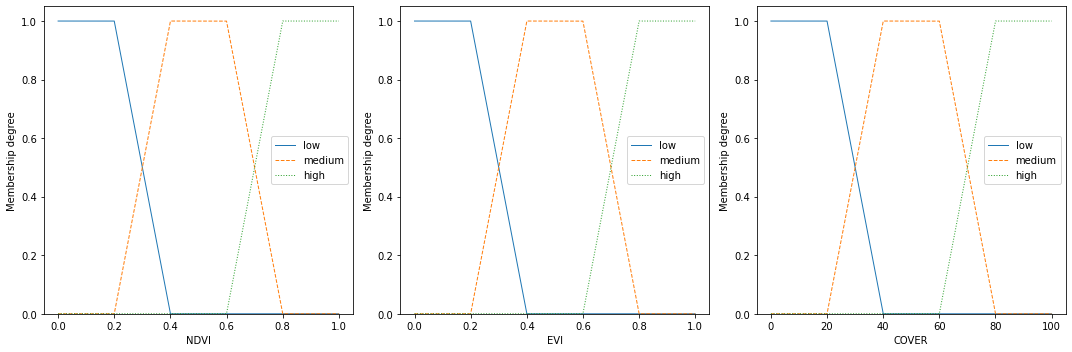

In [ ]:
# SYSTEM 1: COVER ASSESSMENT
# Create fuzzy system object for COVER
FS = FuzzySystem()


# Define fuzzy sets and linguistic variables for NDVI
ndvi1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.4), term="low")
ndvi2 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.4, c=0.6, d=0.8), term="medium")
ndvi3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term="high")
NDVI = LinguisticVariable([ndvi1, ndvi2, ndvi3], concept="NDVI", universe_of_discourse=[0,1])
FS.add_linguistic_variable("NDVI", NDVI)

# Define fuzzy sets and linguistic variables for EVI
evi1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.4), term="low")
evi2 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.4, c=0.6, d=0.8), term="medium")
evi3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term="high")
EVI = LinguisticVariable([evi1, evi2, evi3], concept="EVI", universe_of_discourse=[0,1])
FS.add_linguistic_variable("EVI", EVI)

# Define output fuzzy sets and linguistic variable for COVER
cover1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=20, d=40), term="low")
cover2 = FuzzySet(function=Trapezoidal_MF(a=20, b=40, c=60, d=80), term="medium")
cover3 = FuzzySet(function=Trapezoidal_MF(a=60, b=80, c=100, d=100), term="high")
COVER = LinguisticVariable([cover1, cover2, cover3], concept="COVER", universe_of_discourse=[0,100])
FS.add_linguistic_variable("COVER", COVER)

#Displaying FS
FS.produce_figure()

In [ ]:
# SYSTEM 2 : VEGETATION HEALTH ASSESSMENT
# Create fuzzy system object for the fuzzy decision tree
FS1 = FuzzySystem()

#Define input fuzzy sets and linguistic variable for NDMI
ndmi1 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.6, d=-0.4), term="low")
ndmi2 = FuzzySet(function=Trapezoidal_MF(a=-0.6, b=-0.4, c=-0.1, d=0.1), term="low_medium")
ndmi3 = FuzzySet(function=Trapezoidal_MF(a=-0.1, b=0.1, c=0.4, d=0.6), term="medium_high")
ndmi4 = FuzzySet(function=Trapezoidal_MF(a=0.4, b=0.6, c=1, d=1), term="high")
NDMI = LinguisticVariable([ndmi1, ndmi2, ndmi3, ndmi4], concept="NDMI", universe_of_discourse=[-1,1])
FS1.add_linguistic_variable("NDMI", NDMI)

#Define input fuzzy sets and linguistic variable for NBR
nbr1 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.4, d=-0.1), term="very_low")
nbr2 = FuzzySet(function=Trapezoidal_MF(a=-0.3, b=-0.1, c=0.1, d=0.3), term="low")
nbr3 = FuzzySet(function=Trapezoidal_MF(a=0.1, b=0.3, c=0.5, d=0.7), term="medium")
nbr4 = FuzzySet(function=Trapezoidal_MF(a=0.5, b=0.7, c=1, d=1), term="high")
NBR = LinguisticVariable([nbr1, nbr2, nbr3, nbr4], concept="NBR", universe_of_discourse=[-1,1])
FS1.add_linguistic_variable("NBR", NBR)

# Define fuzzy sets and linguistic variables for NDNI
ndni1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.4), term="low")
ndni2 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.4, c=0.6, d=0.8), term="medium")
ndni3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term="high")
NDNI = LinguisticVariable([ndni1, ndni2, ndni3], concept="NDNI", universe_of_discourse=[0,1])
FS1.add_linguistic_variable("NDNI", NDNI)

# Define fuzzy sets and linguistic variables for SIPI
sipi1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.4, d=0.7), term="low")
sipi2 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1.6, d=1.8), term="medium")
sipi3 = FuzzySet(function=Trapezoidal_MF(a=1.7, b=1.8, c=3, d=3), term="high")
SIPI = LinguisticVariable([sipi1, sipi2, sipi3], concept="SIPI", universe_of_discourse=[0,3])
FS1.add_linguistic_variable("SIPI", SIPI)

# Define fuzzy sets and linguistic variables for PSRI
psri1 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.4, d=-0.2), term="low")
psri2 = FuzzySet(function=Trapezoidal_MF(a=-0.4, b=-0.2, c=0.2, d=0.4), term="medium")
psri3 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.6, c=1, d=1), term="high")
PSRI = LinguisticVariable([psri1, psri2, psri3], concept="PSRI", universe_of_discourse=[-1,1])
FS1.add_linguistic_variable("PSRI", PSRI)

# Define fuzzy sets and linguistic variables for CRI
cri1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=12, d=15), term="normal")
cri2 = FuzzySet(function=Trapezoidal_MF(a=13, b=15, c=20, d=20), term="high")
CRI = LinguisticVariable([cri1, cri2], concept="CRI", universe_of_discourse=[0,20])
FS1.add_linguistic_variable("CRI", CRI)

# Define fuzzy sets and linguistic variables for ARI
ari1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.12, d=0.16), term="normal")
ari2 = FuzzySet(function=Trapezoidal_MF(a=0.12, b=0.16, c=0.3, d=0.3), term="high")
ARI = LinguisticVariable([ari1, ari2], concept="ARI", universe_of_discourse=[0,0.3])
FS1.add_linguistic_variable("ARI", ARI)

# Define fuzzy sets and linguistic variables for MCARI2
mcari1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.3, d=0.4), term="low")
mcari2 = FuzzySet(function=Trapezoidal_MF(a=0.3, b=0.4, c=0.6, d=0.7), term="medium")
mcari3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.7, c=1, d=1), term="high")
MCARI2 = LinguisticVariable([mcari1, mcari2, mcari3], concept="MCARI2", universe_of_discourse=[0,1])
FS1.add_linguistic_variable("MCARI2", MCARI2)

FS1.add_linguistic_variable("COVER", COVER)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



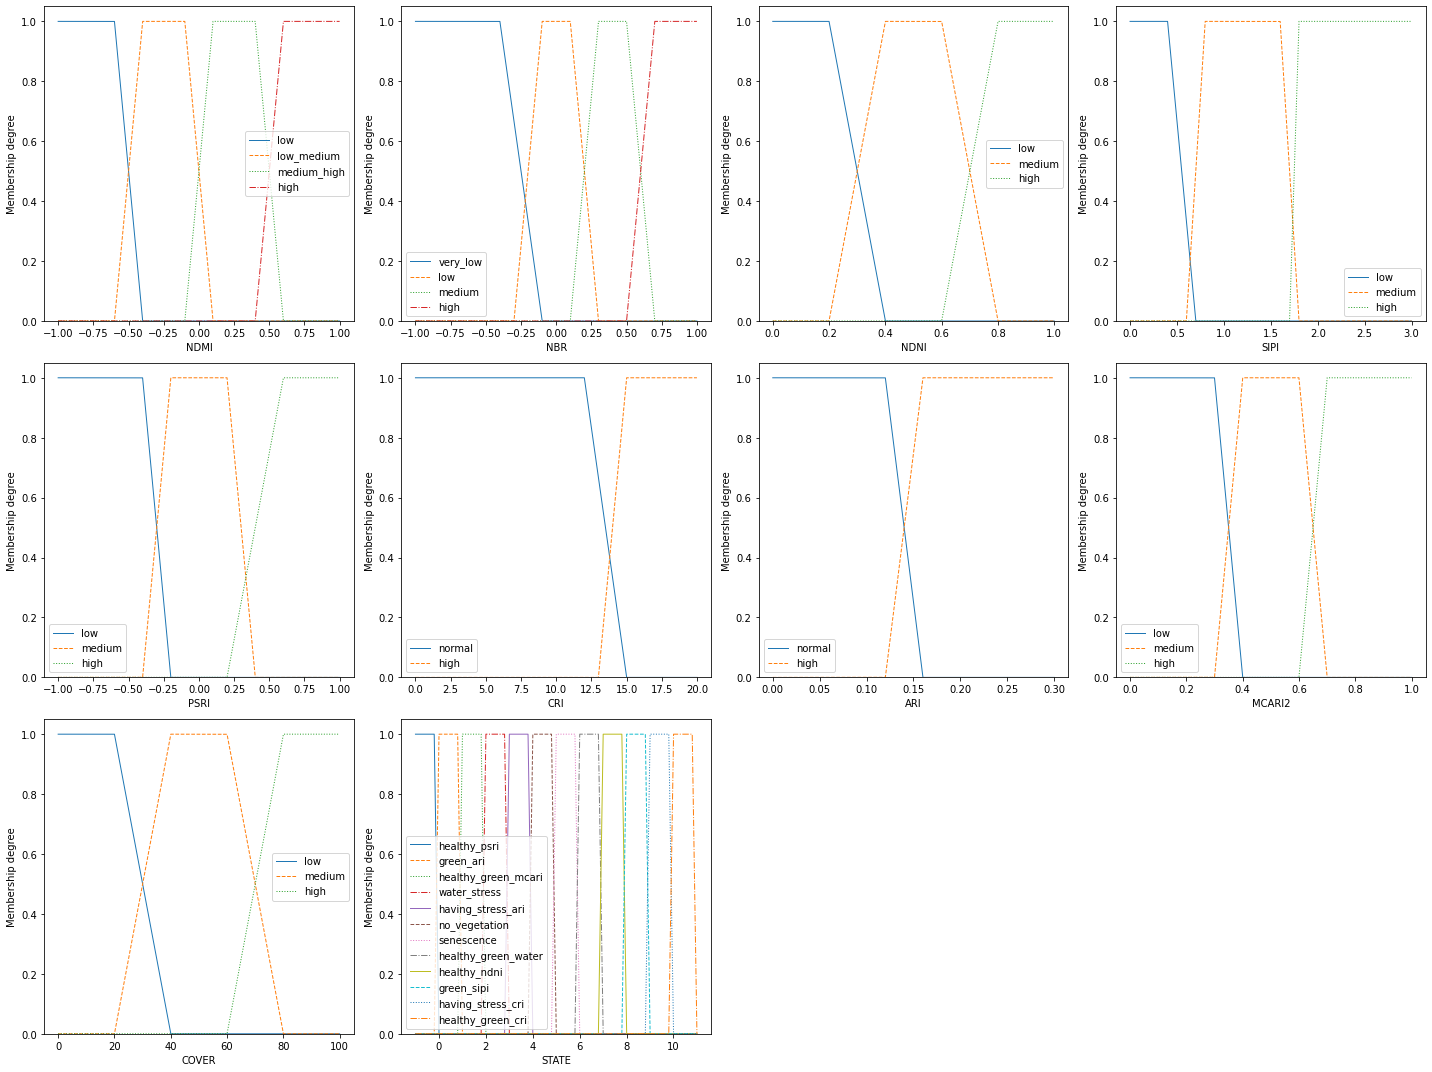

In [ ]:
# Define output fuzzy sets and linguistic variable for STATE
state0 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.2, d=0), term="healthy_psri")
state1 = FuzzySet(function=Trapezoidal_MF(a=-0.2, b=0, c=0.8, d=1), term="green_ari")
state2 = FuzzySet(function=Trapezoidal_MF(a=0.8, b=1, c=1.8, d=2), term="healthy_green_mcari")
state3 = FuzzySet(function=Trapezoidal_MF(a=1.8, b=2, c=2.8, d=3), term="water_stress")
state4 = FuzzySet(function=Trapezoidal_MF(a=2.8, b=3, c=3.8, d=4), term="having_stress_ari")
state5 = FuzzySet(function=Trapezoidal_MF(a=3.8, b=4, c=4.8, d=5), term="no_vegetation")
state6 = FuzzySet(function=Trapezoidal_MF(a=4.8, b=5, c=5.8, d=6), term="senescence")
state7 = FuzzySet(function=Trapezoidal_MF(a=5.8, b=6, c=6.8, d=7), term="healthy_green_water")
state8 = FuzzySet(function=Trapezoidal_MF(a=6.8, b=7, c=7.8, d=8), term="healthy_ndni")
state9 = FuzzySet(function=Trapezoidal_MF(a=7.8, b=8, c=8.8, d=9), term="green_sipi")
state10 = FuzzySet(function=Trapezoidal_MF(a=8.8, b=9, c=9.8, d=10), term="having_stress_cri")
state11 = FuzzySet(function=Trapezoidal_MF(a=9.8, b=10, c=10.8, d=11), term="healthy_green_cri")

STATE = LinguisticVariable([state0, state1, state2, state3, state4, state5, state6, state7, state8, state9, state10, state11], concept="STATE", universe_of_discourse=[-1,11])
FS1.add_linguistic_variable("STATE", STATE)

FS1.produce_figure()

# Fuzzy rules

In [ ]:
# Define fuzzy rules for COVER
FS.add_rules([
  "IF (NDVI IS low) AND (EVI IS low) THEN (COVER IS low)",
  "IF (NDVI IS low) AND (EVI IS medium) THEN (COVER IS medium)",
  "IF (NDVI IS medium) AND (EVI IS low) THEN (COVER IS low)",
  "IF (NDVI IS medium) AND (EVI IS medium) THEN (COVER IS medium)",
  "IF (NDVI IS medium) AND (EVI IS high) THEN (COVER IS high)",
  "IF (NDVI IS high) AND (EVI IS medium) THEN (COVER IS medium)",
  "IF (NDVI IS high) AND (EVI IS high) THEN (COVER IS high)",
  "IF (NDVI IS high) AND (EVI IS low) THEN (COVER IS medium)",
  "IF (NDVI IS low) AND (EVI IS medium) THEN (COVER IS medium)"
])

In [ ]:
# Define fuzzy rules for STATE
FS1.add_rules([
  "IF (COVER IS high) AND (MCARI2 IS high) THEN (STATE IS healthy_green_mcari)",
  "IF (COVER IS high) AND (MCARI2 IS medium) THEN (STATE IS healthy_green_mcari)",
  "IF (COVER IS medium) AND (MCARI2 IS high) THEN (STATE IS healthy_green_mcari)",
  "IF (COVER IS medium) AND (MCARI2 IS medium) THEN (STATE IS healthy_green_mcari)",

  "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS medium) THEN (STATE IS healthy_psri)",
  "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS medium) THEN (STATE IS healthy_psri)",

  "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS high) THEN (STATE IS senescence)",
  "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS high) THEN (STATE IS senescence)",

  "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS high) THEN (STATE IS healthy_green_water)",
  "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS high) THEN (STATE IS healthy_green_water)",

  "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low) THEN (STATE IS water_stress)",
  "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low) THEN (STATE IS water_stress)",
  "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low_medium) THEN (STATE IS water_stress)",
  "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low_medium) THEN (STATE IS water_stress)",
  "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS medium_high) THEN (STATE IS water_stress)",
  "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS medium_high) THEN (STATE IS water_stress)",

  "IF (COVER IS low) AND (NBR IS very_low) THEN (STATE IS no_vegetation)",
  "IF (COVER IS low) AND (NBR IS low) THEN (STATE IS no_vegetation)",

  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS medium) THEN (STATE IS healthy_ndni)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS medium) THEN (STATE IS healthy_ndni)",

  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS high) AND (ARI IS high) THEN (STATE IS having_stress_ari)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS high) AND (ARI IS high) THEN (STATE IS having_stress_ari)",

  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS high) AND (ARI IS normal) THEN (STATE IS green_ari)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS high) AND (ARI IS normal) THEN (STATE IS green_ari)",

  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS medium) THEN (STATE IS green_sipi)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS medium) THEN (STATE IS green_sipi)",

  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS high) THEN (STATE IS having_stress_cri)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS high) THEN (STATE IS having_stress_cri)",
  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS high) THEN (STATE IS having_stress_cri)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS high) THEN (STATE IS having_stress_cri)",

  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)",
  "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)",
  "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)"

])

# Run fuzzy inference

In [ ]:
FS.set_variable("NDVI", meanNDVI)
FS.set_variable("EVI", meanEVI)
COVER = FS.inference()
cover_values = (COVER['COVER'])

print(cover_values)

TypeError: ignored

In [ ]:
FS1.set_variable("COVER", cover_values)
FS1.set_variable("NDMI", meanNDMI)
FS1.set_variable("MCARI2", meanMCARI2)
FS1.set_variable("NDNI", meanNDNI)
FS1.set_variable("NBR", meanNBR)
FS1.set_variable("SIPI", meanSIPI)
FS1.set_variable("ARI", meanARI)
FS1.set_variable("CRI", meanCRI)
FS1.set_variable("PSRI", meanPSRI)
STATE = FS1.inference()
state_values = STATE['STATE']

print(state_values)

In [ ]:
#Defining color and label for each STATE output value
state0_color = "#A2CD5A"
state0 = "Healthy vegetation with a slight decrease in chlorophyll."
state1_color = "#00EE00"
state1 = "Green vegetation with a regular content of anthocyanins."
state2_color = "#00CD00"
state2 = "Green and healthy vegetation with good amounts of chlorophyll."
state3_color = "#ADD8E6"
state3 = "Water stress and less water content."
state4_color = "#D3D3D3"  
state4 = "Excess of nitrogen, this indicates a possible sterility of the plant and sensitivity to pathogens and excess of anthocyanins and therefore a state of stress of the plant."
state5_color = "#8B8B7A"
state5 = "No vegetation with no dry soil." 
state6_color = "#CDCD00"    
state6 = "Canopy stress and onset of canopy senescence."
state7_color = "#54FF9F" 
state7 = "Healthy green vegetation with high leaf water content."
state8_color = "#008000" 
state8 = "Healthy, young, growing vegetation with a good amount of nitrogen."
state9_color = "#32CD32" 
state9 = "Green vegetation with a good ratio of bulk carotenoids to chlorophyll."
state10_color = "#FF8000"
state10 = "Stressed vegetation due to an excess of carotenoids."
state11_color = "#7CFC00"
state11 = "Healthy green vegetation with a good amount of carotenoids."

#Assigning color and label for each STATE output value
print('STATE VEGETATION')
if (state_values >= 0 and state_values<= 0.5) :
  #MCARI low and PSRI medium
  state_color = state0_color
  print(state0)
elif (state_values > 0.5 and state_values <= 1.5) :
  #ARI normal
  state_color = state1_color
  print(state1)
elif (state_values > 1.5 and state_values <= 2.5) :
  #MCARI2 medium or high
  state_color = state2_color
  print(state2)
elif (state_values > 2.5 and state_values <= 3.5) :
  #NDMI non-high
  state_color = state3_color
  print(state3)
elif (state_values > 3.5 and state_values <= 4.5) :
  #ARI high
  state_color = state4_color
elif (state_values > 4.5 and state_values <= 5.5) :
  #NBR high
  state_color = state5_color
  print(state5)
elif (state_values > 5.5 and state_values <= 6.5) :
  #PSRI high
  state_color = state6_color
elif (state_values > 6.5 and state_values <= 7.5) :
  #NDMI high
  state_color = state7_color
  print(state7)
elif (state_values > 7.5 and state_values <= 8.5) :
  #NDNI medium
  state_color = state8_color
  print(state8)
elif (state_values > 8.5 and state_values <= 9.5) :
  #SIPI medium
  state_color = state9_color
  print(state9)
elif (state_values > 9.5 and state_values <= 10.5) :
  # CRI high
  state_color = state10_color
  print(state10)
elif (state_values > 10.5 and state_values <= 11.5) :
  #CRI medium
  state_color = state11_color
  print(state11)

In [ ]:
#clustering training
area = ee.FeatureCollection(geometry)
input =  full_img.clip(area)

#input = images.first()
k = 50
training = input.sample(region=geometry,scale=30,numPixels= 5000)

# Instantiate the clusterer a
clusterer = ee.Clusterer.wekaKMeans(k).train(training)

# Cluster the input using the trained clusterer.
#result = input.cluster(clusterer)
result = img.classify(GTBclassifier)
#result = img.classify(randomForestClassifier_15)
#result = img.classify(SVMclassifier)


# Display the clusters with random colors.
#Map.addLayer(result.randomVisualizer(), {}, 'clusters')

ndvi = ndvi_func(input)
evi = evi_func(input)
ndmi = ndmi_func(input)
psri = psri_func(input)
mcari2 = mcari2_func(input)
ndni = ndni_func(input)
nbr = nbr_func(input)
sipi = sipi_func(input)
ari = ari_func(input)
cri = cri_func(input)

listOfmasks = []
#Masks list to extract each of the k clusters
for i in range(0, k):
  listOfmasks.append(result.select(0).eq(i))


listOfMasked_NDVI=[]
listOfMasked_EVI=[]
listOfMasked_NDMI=[]
listOfMasked_PSRI =[]
listOfMasked_MCARI2 =[]
listOfMasked_NDNI =[]
listOfMasked_NBR=[]
listOfMasked_SIPI=[]
listOfMasked_ARI=[]
listOfMasked_CRI=[]



#Extraction of each of the k cluster from NDVI image
for i in range(0, k):
  listOfMasked_NDVI.append(ndvi.updateMask(listOfmasks[i]).rename("NDVI_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_EVI.append(evi.updateMask(listOfmasks[i]).rename("EVI_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_NDMI.append(ndmi.updateMask(listOfmasks[i]).rename("NDMI_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_PSRI.append(psri.updateMask(listOfmasks[i]).rename("PSRI_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_MCARI2.append(mcari2.updateMask(listOfmasks[i]).rename("MCARI2_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_NDNI.append(ndni.updateMask(listOfmasks[i]).rename("NDNI_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_NBR.append(nbr.updateMask(listOfmasks[i]).rename("NBR_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_SIPI.append(sipi.updateMask(listOfmasks[i]).rename("SIPI_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_ARI.append(ari.updateMask(listOfmasks[i]).rename("ARI_CLUSTER"+str(i)))

for i in range(0, k):
  listOfMasked_CRI.append(cri.updateMask(listOfmasks[i]).rename("CRI_CLUSTER"+str(i)))



#Addition of each of the k cluster NDVI extraction in result image (as a band)
for i in range(0, k):
  result=result.addBands([listOfMasked_NDVI[i]])
  

for i in range(0, k):
  result=result.addBands([listOfMasked_EVI[i]])
  

#Addition of each of the k cluster NDMI extraction in result image (as a band)
for i in range(0, k):
  result=result.addBands([listOfMasked_NDMI[i]])


#Addition of each of the k cluster SAVI extraction in result image (as a band)
for i in range(0, k):
  result=result.addBands([listOfMasked_PSRI[i]])


for i in range(0, k):
  result=result.addBands([listOfMasked_MCARI2[i]])

#Addition of each of the k cluster BAI extraction in result image (as a band)
for i in range(0, k):
  result=result.addBands([listOfMasked_NDNI[i]])

for i in range(0, k):
  result=result.addBands([listOfMasked_NBR[i]])


for i in range(0, k):
  result=result.addBands([listOfMasked_SIPI[i]])


for i in range(0, k):
  result=result.addBands([listOfMasked_ARI[i]])

#Addition of each of the k cluster dNBR extraction in result image (as a band)
for i in range(0, k):
  result=result.addBands([listOfMasked_CRI[i]])


listOf_NDVI_bands=[]
listOf_EVI_bands=[]
listOf_NDMI_bands=[]
listOf_PSRI_bands =[]
listOf_MCARI2_bands =[]
listOf_NDNI_bands =[]
listOf_NBR_bands=[]
listOf_SIPI_bands=[]
listOf_ARI_bands=[]
listOf_CRI_bands=[]

for i in range(0,k):
  listOf_NDVI_bands.append("NDVI_CLUSTER"+str(i))
  listOf_EVI_bands.append("EVI_CLUSTER"+str(i))
  listOf_NDMI_bands.append("NDMI_CLUSTER" + str(i))
  listOf_PSRI_bands.append("PSRI_CLUSTER" + str(i))
  listOf_MCARI2_bands.append("MCARI2_CLUSTER" + str(i))
  listOf_NDNI_bands.append("NDNI_CLUSTER" + str(i))
  listOf_NBR_bands.append("NBR_CLUSTER"+str(i))
  listOf_SIPI_bands.append("SIPI_CLUSTER" + str(i))
  listOf_ARI_bands.append("ARI_CLUSTER"+str(i))
  listOf_CRI_bands.append("CRI_CLUSTER" + str(i))
  

mean_NDVI_Dictionary = result.select(listOf_NDVI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_EVI_Dictionary = result.select(listOf_EVI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_NDMI_Dictionary = result.select(listOf_NDMI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_PSRI_Dictionary = result.select(listOf_PSRI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_MCARI2_Dictionary = result.select(listOf_MCARI2_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_NDNI_Dictionary = result.select(listOf_NDNI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_NBR_Dictionary = result.select(listOf_NBR_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_SIPI_Dictionary = result.select(listOf_SIPI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_ARI_Dictionary = result.select(listOf_ARI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)
mean_CRI_Dictionary = result.select(listOf_CRI_bands).reduceRegion(reducer= ee.Reducer.mean(),geometry= geometry,scale= 30,maxPixels= 1e9)

def remove_none(original):
    result = {}
    for key, value in original.items():
        if value is None:
            value = 0
        result[key] = value
    return result

ndvi_dict = remove_none(mean_NDVI_Dictionary.getInfo())
evi_dict = remove_none(mean_EVI_Dictionary.getInfo())
ndmi_dict = remove_none(mean_NDMI_Dictionary.getInfo())
psri_dict =  remove_none(mean_PSRI_Dictionary.getInfo())
mcari2_dict = remove_none(mean_MCARI2_Dictionary.getInfo())
ndni_dict = remove_none(mean_NDNI_Dictionary.getInfo())
nbr_dict = remove_none(mean_NBR_Dictionary.getInfo())
sipi_dict = remove_none(mean_SIPI_Dictionary.getInfo())
ari_dict = remove_none(mean_ARI_Dictionary.getInfo())
cri_dict = remove_none(mean_CRI_Dictionary.getInfo())

print("Mean cluster NDVI",remove_none(mean_NDVI_Dictionary.getInfo()))
print("Mean cluster EVI",remove_none(mean_EVI_Dictionary.getInfo()))
print("Mean cluster NDMI",remove_none(mean_NDMI_Dictionary.getInfo()))
print("Mean cluster PSRI",remove_none(mean_PSRI_Dictionary.getInfo()))
print("Mean cluster MCARI2",remove_none(mean_MCARI2_Dictionary.getInfo()))
print("Mean cluster NDNI",remove_none(mean_NDNI_Dictionary.getInfo()))
print("Mean cluster NBR",remove_none(mean_NBR_Dictionary.getInfo()))
print("Mean cluster SIPI",remove_none(mean_SIPI_Dictionary.getInfo()))
print("Mean cluster ARI",remove_none(mean_ARI_Dictionary.getInfo()))
print("Mean cluster CRI",remove_none(mean_CRI_Dictionary.getInfo()))

print(mean_NDVI_Dictionary.getInfo().get("NDVI_CLUSTER"+str(0)))





In [ ]:
def state_description(state_label):
  #Defining color and label for each STATE output value
  state0_color = "#A2CD5A"
  state0 = "Healthy vegetation with a slight decrease in chlorophyll."
  state1_color = "#00EE00"
  state1 = "Green vegetation with a regular content of anthocyanins."
  state2_color = "#00CD00"
  state2 = "Green and healthy vegetation with good amounts of chlorophyll."
  state3_color = "#ADD8E6"
  state3 = "Water stress and less water content."
  state4_color = "#D3D3D3"  
  state4 = "Excess of nitrogen, this indicates a possible sterility of the plant and sensitivity to pathogens and excess of anthocyanins and therefore a state of stress of the plant."
  state5_color = "#8B8B7A"
  state5 = "No vegetation with no dry soil." 
  state6_color = "#CDCD00"    
  state6 = "Canopy stress and onset of canopy senescence."
  state7_color = "#54FF9F" 
  state7 = "Healthy green vegetation with high leaf water content."
  state8_color = "#008000" 
  state8 = "Healthy, young, growing vegetation with a good amount of nitrogen."
  state9_color = "#32CD32" 
  state9 = "Green vegetation with a good ratio of bulk carotenoids to chlorophyll."
  state10_color = "#FF8000"
  state10 = "Stressed vegetation due to an excess of carotenoids."
  state11_color = "#7CFC00"
  state11 = "Healthy green vegetation with a good amount of carotenoids."

  state_value = ""
  #Assigning color and label for each STATE output value
  print('STATE VEGETATION')
  if (state_label == "healthy_psri") :
    #MCARI low and PSRI medium
    state_value = state0
    print(state0)
  elif (state_label == "green_ari") :
    #ARI normal
    state_value = state1
    print(state1)
  elif (state_label == "healthy_green_mcari") :
    #MCARI2 medium or high
    state_value = state2
    print(state2)
  elif (state_label == "water_stress") :
    #NDMI non-high
    state_value = state3
    print(state3)
  elif (state_label == "having_stress_ari") :
    #ARI high
    state_value = state4
  elif (state_label == "no_vegetation") :
    #NBR high
    state_value = state5
    print(state5)
  elif (state_label == "senescence") :
    #PSRI high
    state_value = state6
  elif (state_label == "healthy_green_water") :
    #NDMI high
    state_value = state7
    print(state7)
  elif (state_label == "healthy_ndni") :
    #NDNI medium
    state_value = state8
    print(state8)
  elif (state_label == "green_sipi") :
    #SIPI medium
    state_value = state9
    print(state9)
  elif (state_label == "having_stress_cri") :
    # CRI high
    state_value = state10
    print(state10)
  elif (state_label == "healthy_green_cri") :
    #CRI medium
    state_value = state11
    print(state11)
  return state_value

def state_color_detection(state_label):
  #Defining color and label for each STATE output value
  state0_color = '#A2CD5A'
  state0 = "Healthy vegetation with a slight decrease in chlorophyll."
  state1_color = '#00EE00'
  state1 = "Green vegetation with a regular content of anthocyanins."
  state2_color = '#00CD00'
  state2 = "Green and healthy vegetation with good amounts of chlorophyll."
  state3_color = '#ADD8E6'
  state3 = "Water stress and less water content."
  state4_color = '#D3D3D3'  
  state4 = "Excess of nitrogen, this indicates a possible sterility of the plant and sensitivity to pathogens and excess of anthocyanins and therefore a state of stress of the plant."
  state5_color = '#8B8B7A'
  state5 = "No vegetation with no dry soil." 
  state6_color = '#CDCD00'    
  state6 = "Canopy stress and onset of canopy senescence."
  state7_color = '#54FF9F' 
  state7 = "Healthy green vegetation with high leaf water content."
  state8_color = '#008000' 
  state8 = "Healthy, young, growing vegetation with a good amount of nitrogen."
  state9_color = '#32CD32' 
  state9 = "Green vegetation with a good ratio of bulk carotenoids to chlorophyll."
  state10_color = '#FF8000'
  state10 = "Stressed vegetation due to an excess of carotenoids."
  state11_color = '#7CFC00'
  state11 = "Healthy green vegetation with a good amount of carotenoids."

  state_color = ""
  #Assigning color and label for each STATE output value
  print('STATE VEGETATION')
  if (state_label == "healthy_psri") :
    #MCARI low and PSRI medium
    state_color = state0_color
    print(state0)
  elif (state_label == "green_ari") :
    #ARI normal
    state_color = state1_color
    print(state1)
  elif (state_label == "healthy_green_mcari") :
    #MCARI2 medium or high
    state_color = state2_color
    print(state2)
  elif (state_label == "water_stress") :
    #NDMI non-high
    state_color = state3_color
    print(state3)
  elif (state_label == "having_stress_ari") :
    #ARI high
    state_color = state4_color
  elif (state_label == "no_vegetation") :
    #NBR high
    state_color = state5_color
    print(state5)
  elif (state_label == "senescence") :
    #PSRI high
    state_color = state6_color
  elif (state_label == "healthy_green_water") :
    #NDMI high
    state_color = state7_color
    print(state7)
  elif (state_label == "healthy_ndni") :
    #NDNI medium
    state_color = state8_color
    print(state8)
  elif (state_label == "green_sipi") :
    #SIPI medium
    state_color = state9_color
    print(state9)
  elif (state_label == "having_stress_cri") :
    # CRI high
    state_color = state10_color
    print(state10)
  elif (state_label == "healthy_green_cri") :
    #CRI medium
    state_color = state11_color
    print(state11)
  return state_color

def classification_class(value):
  if value > -1 and value < 0.29:
    return 1
  elif value >= 0.30 and value < 0.49:
    return 2  
  elif value >= 0.49 and value < 0.69:
    return 3
  elif value > 0.7:
    return 4

def classification_cover(value):
  if value > 0 and value < 40:
    return 1
  elif value >= 40 and value < 60:
    return 2  
  elif value >= 60 and value < 100:
    return 3

def state_class(state_label):
  #Defining color and label for each STATE output value
  state0_color = "#A2CD5A"
  state0 = "Healthy vegetation with a slight decrease in chlorophyll."
  state1_color = "#00EE00"
  state1 = "Green vegetation with a regular content of anthocyanins."
  state2_color = "#00CD00"
  state2 = "Green and healthy vegetation with good amounts of chlorophyll."
  state3_color = "#ADD8E6"
  state3 = "Water stress and less water content."
  state4_color = "#D3D3D3"  
  state4 = "Excess of nitrogen, this indicates a possible sterility of the plant and sensitivity to pathogens and excess of anthocyanins and therefore a state of stress of the plant."
  state5_color = "#8B8B7A"
  state5 = "No vegetation with no dry soil." 
  state6_color = "#CDCD00"    
  state6 = "Canopy stress and onset of canopy senescence."
  state7_color = "#54FF9F" 
  state7 = "Healthy green vegetation with high leaf water content."
  state8_color = "#008000" 
  state8 = "Healthy, young, growing vegetation with a good amount of nitrogen."
  state9_color = "#32CD32" 
  state9 = "Green vegetation with a good ratio of bulk carotenoids to chlorophyll."
  state10_color = "#FF8000"
  state10 = "Stressed vegetation due to an excess of carotenoids."
  state11_color = "#7CFC00"
  state11 = "Healthy green vegetation with a good amount of carotenoids."

  state_value = ""
  #Assigning color and label for each STATE output value
  print('STATE VEGETATION')
  if (state_label == "healthy_psri") :
    #MCARI low and PSRI medium
    state_value = 2
    print(state0)
  elif (state_label == "green_ari") :
    #ARI normal
    state_value = 3
    print(state1)
  elif (state_label == "healthy_green_mcari") :
    #MCARI2 medium or high
    state_value = 3
    print(state2)
  elif (state_label == "water_stress") :
    #NDMI non-high
    state_value = 1
    print(state3)
  elif (state_label == "having_stress_ari") :
    #ARI high
    state_value = 1
  elif (state_label == "no_vegetation") :
    #NBR high
    state_value = 1
    print(state5)
  elif (state_label == "senescence") :
    #PSRI high
    state_value = 1
  elif (state_label == "healthy_green_water") :
    #NDMI high
    state_value = 3
    print(state7)
  elif (state_label == "healthy_ndni") :
    #NDNI medium
    state_value = 3
    print(state8)
  elif (state_label == "green_sipi") :
    #SIPI medium
    state_value = 3
    print(state9)
  elif (state_label == "having_stress_cri") :
    # CRI high
    state_value = 1
    print(state10)
  elif (state_label == "healthy_green_cri") :
    #CRI medium
    state_value = 3
    print(state11)
  return state_value


def fuzzyDecisionTree(ndvi_values, evi_values, ndmi_values, mcari2_values, ndni_values, nbr_values, sipi_values, ari_values, cri_values, psri_values):
  FS = FuzzySystem()

  # Define fuzzy sets and linguistic variables for NDVI
  ndvi1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.4), term="low")
  ndvi2 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.4, c=0.6, d=0.8), term="medium")
  ndvi3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term="high")
  NDVI = LinguisticVariable([ndvi1, ndvi2, ndvi3], concept="NDVI", universe_of_discourse=[0,1])
  FS.add_linguistic_variable("NDVI", NDVI)

  # Define fuzzy sets and linguistic variables for EVI
  evi1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.4), term="low")
  evi2 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.4, c=0.6, d=0.8), term="medium")
  evi3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term="high")
  EVI = LinguisticVariable([evi1, evi2, evi3], concept="EVI", universe_of_discourse=[0,1])
  FS.add_linguistic_variable("EVI", EVI)

  # Define output fuzzy sets and linguistic variable for COVER
  cover1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=20, d=40), term="low")
  cover2 = FuzzySet(function=Trapezoidal_MF(a=20, b=40, c=60, d=80), term="medium")
  cover3 = FuzzySet(function=Trapezoidal_MF(a=60, b=80, c=100, d=100), term="high")
  COVER = LinguisticVariable([cover1, cover2, cover3], concept="COVER", universe_of_discourse=[0,100])
  FS.add_linguistic_variable("COVER", COVER)
  
  # Create fuzzy system object for the fuzzy decision tree
  FS1 = FuzzySystem()

  #Define input fuzzy sets and linguistic variable for NDMI
  ndmi1 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.6, d=-0.4), term="low")
  ndmi2 = FuzzySet(function=Trapezoidal_MF(a=-0.6, b=-0.4, c=-0.1, d=0.1), term="low_medium")
  ndmi3 = FuzzySet(function=Trapezoidal_MF(a=-0.1, b=0.1, c=0.4, d=0.6), term="medium_high")
  ndmi4 = FuzzySet(function=Trapezoidal_MF(a=0.4, b=0.6, c=1, d=1), term="high")
  NDMI = LinguisticVariable([ndmi1, ndmi2, ndmi3, ndmi4], concept="NDMI", universe_of_discourse=[-1,1])
  FS1.add_linguistic_variable("NDMI", NDMI)

  #Define input fuzzy sets and linguistic variable for NBR
  nbr1 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.4, d=-0.1), term="very_low")
  nbr2 = FuzzySet(function=Trapezoidal_MF(a=-0.3, b=-0.1, c=0.1, d=0.3), term="low")
  nbr3 = FuzzySet(function=Trapezoidal_MF(a=0.1, b=0.3, c=0.5, d=0.7), term="medium")
  nbr4 = FuzzySet(function=Trapezoidal_MF(a=0.5, b=0.7, c=1, d=1), term="high")
  NBR = LinguisticVariable([nbr1, nbr2, nbr3, nbr4], concept="NBR", universe_of_discourse=[-1,1])
  FS1.add_linguistic_variable("NBR", NBR)

  # Define fuzzy sets and linguistic variables for NDNI
  ndni1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.2, d=0.4), term="low")
  ndni2 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.4, c=0.6, d=0.8), term="medium")
  ndni3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1, d=1), term="high")
  NDNI = LinguisticVariable([ndni1, ndni2, ndni3], concept="NDNI", universe_of_discourse=[0,1])
  FS1.add_linguistic_variable("NDNI", NDNI)

  # Define fuzzy sets and linguistic variables for SIPI
  sipi1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.4, d=0.7), term="low")
  sipi2 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.8, c=1.6, d=1.8), term="medium")
  sipi3 = FuzzySet(function=Trapezoidal_MF(a=1.7, b=1.8, c=3, d=3), term="high")
  SIPI = LinguisticVariable([sipi1, sipi2, sipi3], concept="SIPI", universe_of_discourse=[0,3])
  FS1.add_linguistic_variable("SIPI", SIPI)

  # Define fuzzy sets and linguistic variables for PSRI
  psri1 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.4, d=-0.2), term="low")
  psri2 = FuzzySet(function=Trapezoidal_MF(a=-0.4, b=-0.2, c=0.2, d=0.4), term="medium")
  psri3 = FuzzySet(function=Trapezoidal_MF(a=0.2, b=0.6, c=1, d=1), term="high")
  PSRI = LinguisticVariable([psri1, psri2, psri3], concept="PSRI", universe_of_discourse=[-1,1])
  FS1.add_linguistic_variable("PSRI", PSRI)

  # Define fuzzy sets and linguistic variables for CRI
  cri1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=12, d=15), term="normal")
  cri2 = FuzzySet(function=Trapezoidal_MF(a=13, b=15, c=20, d=20), term="high")
  CRI = LinguisticVariable([cri1, cri2], concept="CRI", universe_of_discourse=[0,20])
  FS1.add_linguistic_variable("CRI", CRI)

  # Define fuzzy sets and linguistic variables for ARI
  ari1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.12, d=0.16), term="normal")
  ari2 = FuzzySet(function=Trapezoidal_MF(a=0.12, b=0.16, c=0.3, d=0.3), term="high")
  ARI = LinguisticVariable([ari1, ari2], concept="ARI", universe_of_discourse=[0,0.3])
  FS1.add_linguistic_variable("ARI", ARI)

  # Define fuzzy sets and linguistic variables for MCARI2
  mcari1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=0.3, d=0.4), term="low")
  mcari2 = FuzzySet(function=Trapezoidal_MF(a=0.3, b=0.4, c=0.6, d=0.7), term="medium")
  mcari3 = FuzzySet(function=Trapezoidal_MF(a=0.6, b=0.7, c=1, d=1), term="high")
  MCARI2 = LinguisticVariable([mcari1, mcari2, mcari3], concept="MCARI2", universe_of_discourse=[0,1])
  FS1.add_linguistic_variable("MCARI2", MCARI2)

  FS1.add_linguistic_variable("COVER", COVER)

  # Define output fuzzy sets and linguistic variable for STATE
  state0 = FuzzySet(function=Trapezoidal_MF(a=-1, b=-1, c=-0.2, d=0), term="healthy_psri")
  state1 = FuzzySet(function=Trapezoidal_MF(a=-0.2, b=0, c=0.8, d=1), term="green_ari")
  state2 = FuzzySet(function=Trapezoidal_MF(a=0.8, b=1, c=1.8, d=2), term="healthy_green_mcari")
  state3 = FuzzySet(function=Trapezoidal_MF(a=1.8, b=2, c=2.8, d=3), term="water_stress")
  state4 = FuzzySet(function=Trapezoidal_MF(a=2.8, b=3, c=3.8, d=4), term="having_stress_ari")
  state5 = FuzzySet(function=Trapezoidal_MF(a=3.8, b=4, c=4.8, d=5), term="no_vegetation")
  state6 = FuzzySet(function=Trapezoidal_MF(a=4.8, b=5, c=5.8, d=6), term="senescence")
  state7 = FuzzySet(function=Trapezoidal_MF(a=5.8, b=6, c=6.8, d=7), term="healthy_green_water")
  state8 = FuzzySet(function=Trapezoidal_MF(a=6.8, b=7, c=7.8, d=8), term="healthy_ndni")
  state9 = FuzzySet(function=Trapezoidal_MF(a=7.8, b=8, c=8.8, d=9), term="green_sipi")
  state10 = FuzzySet(function=Trapezoidal_MF(a=8.8, b=9, c=9.8, d=10), term="having_stress_cri")
  state11 = FuzzySet(function=Trapezoidal_MF(a=9.8, b=10, c=10.8, d=11), term="healthy_green_cri")

  STATE = LinguisticVariable([state0, state1, state2, state3, state4, state5, state6, state7, state8, state9, state10, state11], concept="STATE", universe_of_discourse=[-1,11])
  FS1.add_linguistic_variable("STATE", STATE)

  # Define fuzzy rules for COVER
  FS.add_rules([
    "IF (NDVI IS low) AND (EVI IS low) THEN (COVER IS low)",
    "IF (NDVI IS low) AND (EVI IS medium) THEN (COVER IS medium)",
    "IF (NDVI IS medium) AND (EVI IS low) THEN (COVER IS low)",
    "IF (NDVI IS medium) AND (EVI IS medium) THEN (COVER IS medium)",
    "IF (NDVI IS medium) AND (EVI IS high) THEN (COVER IS high)",
    "IF (NDVI IS high) AND (EVI IS medium) THEN (COVER IS medium)",
    "IF (NDVI IS high) AND (EVI IS high) THEN (COVER IS high)",
    "IF (NDVI IS high) AND (EVI IS low) THEN (COVER IS medium)",
    "IF (NDVI IS low) AND (EVI IS medium) THEN (COVER IS medium)"
  ])

  FS1.add_rules([
    "IF (COVER IS high) AND (MCARI2 IS high) THEN (STATE IS healthy_green_mcari)",
    "IF (COVER IS high) AND (MCARI2 IS medium) THEN (STATE IS healthy_green_mcari)",
    "IF (COVER IS medium) AND (MCARI2 IS high) THEN (STATE IS healthy_green_mcari)",
    "IF (COVER IS medium) AND (MCARI2 IS medium) THEN (STATE IS healthy_green_mcari)",

    "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS medium) THEN (STATE IS healthy_psri)",
    "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS medium) THEN (STATE IS healthy_psri)",

    "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS high) THEN (STATE IS senescence)",
    "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS high) THEN (STATE IS senescence)",

    "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS high) THEN (STATE IS healthy_green_water)",
    "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS high) THEN (STATE IS healthy_green_water)",

    "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low) THEN (STATE IS water_stress)",
    "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low) THEN (STATE IS water_stress)",
    "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low_medium) THEN (STATE IS water_stress)",
    "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS low_medium) THEN (STATE IS water_stress)",
    "IF (COVER IS high) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS medium_high) THEN (STATE IS water_stress)",
    "IF (COVER IS medium) AND (MCARI2 IS low) AND (PSRI IS low) AND (NDMI IS medium_high) THEN (STATE IS water_stress)",

    "IF (COVER IS low) AND (NBR IS very_low) THEN (STATE IS no_vegetation)",
    "IF (COVER IS low) AND (NBR IS low) THEN (STATE IS no_vegetation)",

    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS medium) THEN (STATE IS healthy_ndni)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS medium) THEN (STATE IS healthy_ndni)",

    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS high) AND (ARI IS high) THEN (STATE IS having_stress_ari)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS high) AND (ARI IS high) THEN (STATE IS having_stress_ari)",

    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS high) AND (ARI IS normal) THEN (STATE IS green_ari)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS high) AND (ARI IS normal) THEN (STATE IS green_ari)",

    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS medium) THEN (STATE IS green_sipi)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS medium) THEN (STATE IS green_sipi)",

    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS high) THEN (STATE IS having_stress_cri)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS high) THEN (STATE IS having_stress_cri)",
    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS high) THEN (STATE IS having_stress_cri)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS high) THEN (STATE IS having_stress_cri)",

    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS high) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)",
    "IF (COVER IS low) AND (NBR IS medium) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)",
    "IF (COVER IS low) AND (NBR IS high) AND (NDNI IS low) AND (SIPI IS low) AND (CRI IS normal) THEN (STATE IS healthy_green_cri)"

  ])

  #param setting.
  FS.set_variable("NDVI", ndvi_values)
  FS.set_variable("EVI", evi_values)
  COVER = FS.inference()
  cover_values = (COVER['COVER'])

  print(cover_values)  

  FS1.set_variable("COVER", cover_values)
  FS1.set_variable("NDMI", ndmi_values)
  FS1.set_variable("MCARI2", mcari2_values)
  FS1.set_variable("NDNI", ndni_values)
  FS1.set_variable("NBR", nbr_values)
  FS1.set_variable("SIPI", sipi_values)
  FS1.set_variable("ARI", ari_values)
  FS1.set_variable("CRI", cri_values)
  FS1.set_variable("PSRI", psri_values)
  STATE = FS1.inference()
  state_values = STATE['STATE']

  max = -100;
  for key, value in STATE.items():
        for fuzSet in FS1.get_fuzzy_sets("STATE"):
            if fuzSet.get_value(value) > max:
                max = fuzSet.get_value(value);
                maxLabel = fuzSet.get_term();

            print("max: ", max)
            print("effective max: ", fuzSet.get_value(value))
            print("Label: ", fuzSet.get_term())
            print(" ")

  print("previous value")
  print(state_values)
  state_to_return = []
  state_to_return.append(state_description(maxLabel))
  state_to_return.append(state_color_detection(maxLabel))
  state_to_return.append(state_class(maxLabel))
  state_to_return.append(cover_values)
  return state_to_return

In [ ]:
listOfObjects = [] 

#Map creation
Map = geemap.Map()
Map.add_basemap('HYBRID')
Map.centerObject(ee_object=geometry, zoom=10)

#Legend creation
list_of_colors = []
list_of_keys = []
#counters
tp = 0

for i in range(0,k):
    a = fuzzyDecisionTree(ndvi_dict.get("NDVI_CLUSTER"+str(i)), evi_dict.get("EVI_CLUSTER"+str(i)), ndmi_dict.get("NDMI_CLUSTER"+str(i)), psri_dict.get("PSRI_CLUSTER"+str(i)), mcari2_dict.get("MCARI2_CLUSTER"+str(i)), ndni_dict.get("NDNI_CLUSTER"+str(i)), nbr_dict.get("NBR_CLUSTER"+str(i)), sipi_dict.get("SIPI_CLUSTER"+str(i)), ari_dict.get("ARI_CLUSTER"+str(i)), cri_dict.get("CRI_CLUSTER"+str(i)));
    print("The vegetation state for the sub-area "+str(i)+ " is "+a[0])
    print("The decision tree output for the sub-area "+str(i)+ " is "+ str(a[2]))
    print("NDVI mean class: "+ str(classification_class(ndvi_dict.get("NDVI_CLUSTER"+str(i)))))
    print("Cover mean class: "+ str(classification_cover(a[3])))
    print(a[1])
    print(a[3])
    list_of_colors.append(a[1])
    list_of_keys.append(a[0])

    if a[2] == classification_class(ndvi_dict.get("NDVI_CLUSTER"+str(i))):
      tp = tp +1
    
print("L'accuracy è " + str(tp/k))

legend_keys = list_of_keys
legend_colors = list_of_colors

#Cambiare quisotto se si cambia il k
result = result.remap([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

Map.addLayer( result, {'min': 1, 'max': 3, 'palette': legend_colors}, 'Labelled clusters')
Map.add_legend(legend_keys=legend_keys, legend_colors=legend_colors, position='topleft')

#Adding layer to the map
#Map.addLayer(geometry, {"color": 'blue'}, 'AOI', True, 0.5)


#Displaying map    
Map.addLayerControl()
Map